<a href="https://colab.research.google.com/github/bhaveshwadhwani/AppliedAI/blob/master/bhaveshwadhwani11114%40gmail.com_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [22]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (1.19.2.4~dfsg-1build4).
pandoc set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain

In [24]:
!ls

bhaveshwadhwani11114@gmail.com_9.ipynb	drive  sample_data


In [25]:
!jupyter nbconvert --to PDF "bhaveshwadhwani11114@gmail.com_9.ipynb"

[NbConvertApp] Converting notebook bhaveshwadhwani11114@gmail.com_9.ipynb to PDF
[NbConvertApp] Support files will be in bhaveshwadhwani11114@gmail.com_9_files/
[NbConvertApp] Making directory ./bhaveshwadhwani11114@gmail.com_9_files
[NbConvertApp] Making directory ./bhaveshwadhwani11114@gmail.com_9_files
[NbConvertApp] Making directory ./bhaveshwadhwani11114@gmail.com_9_files
[NbConvertApp] Making directory ./bhaveshwadhwani11114@gmail.com_9_files
[NbConvertApp] Making directory ./bhaveshwadhwani11114@gmail.com_9_files
[NbConvertApp] Making directory ./bhaveshwadhwani11114@gmail.com_9_files
[NbConvertApp] Making directory ./bhaveshwadhwani11114@gmail.com_9_files
[NbConvertApp] Making directory ./bhaveshwadhwani11114@gmail.com_9_files
[NbConvertApp] Making directory ./bhaveshwadhwani11114@gmail.com_9_files
[NbConvertApp] Making directory ./bhaveshwadhwani11114@gmail.com_9_files
[NbConvertApp] Making directory ./bhaveshwadhwani11114@gmail.com_9_files
[NbConvertApp] Making directory ./bh

In [0]:
!cp "drive/My Drive/Colab Notebooks/bhaveshwadhwani11114@gmail.com_9.ipynb" ./

In [0]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls

drive  sample_data


## 1.1 Reading Data

In [0]:
project_data = pd.read_csv('drive/My Drive/Assignments_DonorsChoose_2018/train_data.csv')
resource_data = pd.read_csv('drive/My Drive/Assignments_DonorsChoose_2018/resources.csv')

In [0]:
# project_data.columns

In [0]:
# project_data['project_is_approved'].unique()

In [0]:
# # https://stackoverflow.com/questions/52076415/calculating-conditional-probabilities-for-categorical-and-continuous-variables-i
# probs={}
# for cat in project_data['project_grade_category'].unique():
#     tdf=project_data[project_data['project_is_approved']==1]
#     N=len(tdf) #total 
#     n=len(tdf[tdf['project_grade_category']==cat]) #occurences
#     probs[cat]=(n/N)

In [0]:
# probs

In [0]:
# print("N: ",N," n: ",n)

In [0]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [0]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

Unnamed: 0  ... project_is_approved
55660        8393  ...                   1
76127       37728  ...                   1

[2 rows x 17 columns]

In [0]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity   price
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1  149.00
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   14.95

## 1.2 preprocessing of `project_subject_categories`

In [0]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=(j.lower()).strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


In [0]:
sorted_cat_dict

{'appliedlearning': 12135,
 'care_hunger': 1388,
 'health_sports': 14223,
 'history_civics': 5914,
 'literacy_language': 52239,
 'math_science': 41421,
 'music_arts': 10293,
 'specialneeds': 13642,
 'warmth': 1388}

## 1.3 preprocessing of `project_subject_subcategories`

In [0]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=(j.lower()).strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [0]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [0]:
project_data.head(2)

Unnamed: 0  ...                                              essay
55660        8393  ...  I have been fortunate enough to use the Fairy ...
76127       37728  ...  Imagine being 8-9 years old. You're in your th...

[2 rows x 18 columns]

In [0]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [0]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

I have been fortunate enough to use the Fairy Tale STEM kits in my classroom as well as the STEM journals, which my students really enjoyed.  I would love to implement more of the Lakeshore STEM kits in my classroom for the next school year as they provide excellent and engaging STEM lessons.My students come from a variety of backgrounds, including language and socioeconomic status.  Many of them don't have a lot of experience in science and engineering and these kits give me the materials to provide these exciting opportunities for my students.Each month I try to do several science or STEM/STEAM projects.  I would use the kits and robot to help guide my science instruction in engaging and meaningful ways.  I can adapt the kits to my current language arts pacing guide where we already teach some of the material in the kits like tall tales (Paul Bunyan) or Johnny Appleseed.  The following units will be taught in the next school year where I will implement these kits: magnets, motion, si

In [0]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [0]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

\"A person is a person, no matter how small.\" (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed. \r\nStudents in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.\r\nOur school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the ear

In [0]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

 A person is a person, no matter how small.  (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed.   Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.  Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the early chi

In [0]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

 A person is a person no matter how small Dr Seuss I teach the smallest students with the biggest enthusiasm for learning My students learn in many different ways using all of our senses and multiple intelligences I use a wide range of techniques to help all my students succeed Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures including Native Americans Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom Kindergarteners in my class love to work with hands on materials and have many different opportunities to practice a skill before it is mastered Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum Montana is the perfect place to learn about agriculture and nutrition My students love to role play in our pretend kitchen in the early childhood classroom

In [0]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [0]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = sentance.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    sent = decontracted(sent)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 109248/109248 [00:55<00:00, 1983.02it/s]


In [0]:
# after preprocesing
preprocessed_essays[20000]

'person person no matter small dr seuss teach smallest students biggest enthusiasm learning students learn many different ways using senses multiple intelligences use wide range techniques help students succeed students class come variety different backgrounds makes wonderful sharing experiences cultures including native americans school caring community successful learners seen collaborative student project based learning classroom kindergarteners class love work hands materials many different opportunities practice skill mastered social skills work cooperatively friends crucial aspect kindergarten curriculum montana perfect place learn agriculture nutrition students love role play pretend kitchen early childhood classroom several kids ask try cooking real food take idea create common core cooking lessons learn important math writing concepts cooking delicious healthy food snack time students grounded appreciation work went making food knowledge ingredients came well healthy bodies pr

In [0]:
project_data['preprocessed_essays'] = preprocessed_essays
project_data['essay_word_count'] = [len(essay.split()) for essay in preprocessed_essays]
project_data.drop(['essay'], axis=1, inplace=True)

<h2><font color='red'> 1.3.4 Preprocessing of `project_title`</font></h2>

In [0]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = sentance.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    sent = decontracted(sent)
    preprocessed_title.append(sent.lower().strip())

100%|██████████| 109248/109248 [00:02<00:00, 41660.26it/s]


In [0]:
project_data['preprocessed_title'] = preprocessed_title
project_data['title_count'] = [len(title.split()) for title in preprocessed_title]
project_data.drop(['project_title'], axis=1, inplace=True)

In [0]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_grades = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_grade_category'].values):
    sent = sentance.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    sent = re.sub(r" ","_",sent)
    sent = decontracted(sent)
    preprocessed_grades.append(sent.lower().strip())

100%|██████████| 109248/109248 [00:02<00:00, 48622.60it/s]


In [0]:
project_data['preprocessed_grades'] = preprocessed_grades
project_data.drop(['project_grade_category'], axis=1, inplace=True)

In [0]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'preprocessed_essays',
       'essay_word_count', 'preprocessed_title', 'title_count',
       'preprocessed_grades'],
      dtype='object')

### Merge price data from resources

In [0]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

Splitting data into Train Test CV

In [0]:
y = project_data['project_is_approved'].values
X = project_data.drop(['project_is_approved'], axis=1)


In [0]:
project_data.shape

(109248, 22)

In [0]:
X.shape

(109248, 21)

In [0]:
project_data.drop(labels=['project_essay_1', 'project_essay_2', 'project_essay_3','project_essay_4'],axis=1,inplace=True)

In [0]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'preprocessed_essays',
       'essay_word_count', 'preprocessed_title', 'title_count',
       'preprocessed_grades', 'price', 'quantity'],
      dtype='object')

## 1.4 Splitting data into Train and cross validation(or test): Stratified Sampling

In [0]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

In [0]:
train = pd.Series(y_train)
train.value_counts()


1    41615
0     7426
dtype: int64

In [0]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'preprocessed_essays',
       'essay_word_count', 'preprocessed_title', 'title_count',
       'preprocessed_grades', 'price', 'quantity'],
      dtype='object')

## 1.5 Make Data Model Ready: encoding numerical, categorical features

In [0]:
X_train.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'preprocessed_essays', 'essay_word_count',
       'preprocessed_title', 'title_count', 'preprocessed_grades', 'price',
       'quantity'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

<h2>1.5  Make Data Model Ready: encoding numerical, categorical features</h2>

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [0]:
## https://stackoverflow.com/questions/52076415/calculating-conditional-probabilities-for-categorical-and-continuous-variables-i
for_prob_df = pd.DataFrame()
for_prob_df['clean_categories'] = X_train['clean_categories']
for_prob_df['project_is_approved'] = y_train


probs_pos={}
probs_neg={}
for cat in for_prob_df['clean_categories'].unique():
    total_pos = for_prob_df[for_prob_df['project_is_approved']==1]
    pos_cat = total_pos[total_pos['clean_categories']==cat] #occurences of category in positive labeled data points
    probs_pos[cat]=(len(pos_cat)/len(total_pos))

    total_neg = for_prob_df[for_prob_df['project_is_approved']==0]
    neg_cat = total_neg[total_neg['clean_categories']==cat] #occurences of category in negative labeled data points
    probs_neg[cat]=(len(neg_cat)/len(total_neg))

clean_categories_pos=[]
clean_categories_neg=[]
##Assigning probabilities to categories
for cat in X_train["clean_categories"]:
    if cat in probs_pos:
        clean_categories_pos.append(probs_pos[cat])
    else :
        clean_categories_pos.append(0.5)
    if cat in probs_neg:
        clean_categories_neg.append(probs_neg[cat])
    else :
        clean_categories_neg.append(0.5)

X_train.drop('clean_categories', axis=1, inplace=True)
X_train["clean_categories_pos"] = clean_categories_pos
X_train["clean_categories_neg"] = clean_categories_neg


clean_categories_pos=[]
clean_categories_neg=[]
##Assigning probabilities to categories X_CV
for cat in X_cv["clean_categories"]:
    if cat in probs_pos:
        clean_categories_pos.append(probs_pos[cat])
    else :
        clean_categories_pos.append(0.5)
    if cat in probs_neg:
        clean_categories_neg.append(probs_neg[cat])
    else :
        clean_categories_neg.append(0.5)

X_cv.drop('clean_categories', axis=1, inplace=True)
X_cv["clean_categories_pos"] = clean_categories_pos
X_cv["clean_categories_neg"] = clean_categories_neg


clean_categories_pos=[]
clean_categories_neg=[]
##Assigning probabilities to categories in X_test
for cat in X_test["clean_categories"]:
    if cat in probs_pos:
        clean_categories_pos.append(probs_pos[cat])
    else :
        clean_categories_pos.append(0.5)
    if cat in probs_neg:
        clean_categories_neg.append(probs_neg[cat])
    else :
        clean_categories_neg.append(0.5)

X_test.drop('clean_categories', axis=1, inplace=True)
X_test["clean_categories_pos"] = clean_categories_pos
X_test["clean_categories_neg"] = clean_categories_neg

print(X_train['clean_categories_pos'].shape)
print(X_cv['clean_categories_pos'].shape)
print(X_test['clean_categories_pos'].shape)
print(X_train['clean_categories_neg'].shape)

(49041,)
(24155,)
(36052,)
(49041,)


In [0]:
## https://stackoverflow.com/questions/52076415/calculating-conditional-probabilities-for-categorical-and-continuous-variables-i
for_prob_df = pd.DataFrame()
for_prob_df['clean_subcategories'] = X_train['clean_subcategories']
for_prob_df['project_is_approved'] = y_train


probs_pos={}
probs_neg={}
for cat in for_prob_df['clean_subcategories'].unique():
    total_pos = for_prob_df[for_prob_df['project_is_approved']==1]
    pos_cat = total_pos[total_pos['clean_subcategories']==cat] #occurences of category in positive labeled data points
    probs_pos[cat]=(len(pos_cat)/len(total_pos))

    total_neg = for_prob_df[for_prob_df['project_is_approved']==0]
    neg_cat = total_neg[total_neg['clean_subcategories']==cat] #occurences of category in negative labeled data points
    probs_neg[cat]=(len(neg_cat)/len(total_neg))

clean_subcategories_pos=[]
clean_subcategories_neg=[]
##Assigning probabilities to categories
for cat in X_train["clean_subcategories"]:
    if cat in probs_pos:
        clean_subcategories_pos.append(probs_pos[cat])
    else :
        clean_subcategories_pos.append(0.5)
    if cat in probs_neg:
        clean_subcategories_neg.append(probs_neg[cat])
    else :
        clean_subcategories_neg.append(0.5)

X_train.drop('clean_subcategories', axis=1, inplace=True)
X_train["clean_subcategories_pos"] = clean_subcategories_pos
X_train["clean_subcategories_neg"] = clean_subcategories_neg

clean_subcategories_pos=[]
clean_subcategories_neg=[]
##Assigning probabilities to categories
for cat in X_cv["clean_subcategories"]:
    if cat in probs_pos:
        clean_subcategories_pos.append(probs_pos[cat])
    else :
        clean_subcategories_pos.append(0.5)
    if cat in probs_neg:
        clean_subcategories_neg.append(probs_neg[cat])
    else :
        clean_subcategories_neg.append(0.5)

X_cv.drop('clean_subcategories', axis=1, inplace=True)
X_cv["clean_subcategories_pos"] = clean_subcategories_pos
X_cv["clean_subcategories_neg"] = clean_subcategories_neg

clean_subcategories_pos=[]
clean_subcategories_neg=[]
##Assigning probabilities to categories
for cat in X_test["clean_subcategories"]:
    if cat in probs_pos:
        clean_subcategories_pos.append(probs_pos[cat])
    else :
        clean_subcategories_pos.append(0.5)
    if cat in probs_neg:
        clean_subcategories_neg.append(probs_neg[cat])
    else :
        clean_subcategories_neg.append(0.5)

X_test.drop('clean_subcategories', axis=1, inplace=True)
X_test["clean_subcategories_pos"] = clean_subcategories_pos
X_test["clean_subcategories_neg"] = clean_subcategories_neg

print(X_train['clean_subcategories_pos'].shape)
print(X_cv['clean_subcategories_pos'].shape)
print(X_test['clean_subcategories_pos'].shape)

(49041,)
(24155,)
(36052,)


In [0]:
## https://stackoverflow.com/questions/52076415/calculating-conditional-probabilities-for-categorical-and-continuous-variables-i
for_prob_df = pd.DataFrame()
for_prob_df['school_state'] = X_train['school_state']
for_prob_df['project_is_approved'] = y_train


probs_pos={}
probs_neg={}
for cat in for_prob_df['school_state'].unique():
    total_pos = for_prob_df[for_prob_df['project_is_approved']==1]
    pos_cat = total_pos[total_pos['school_state']==cat] #occurences of category in positive labeled data points
    probs_pos[cat]=(len(pos_cat)/len(total_pos))

    total_neg = for_prob_df[for_prob_df['project_is_approved']==0]
    neg_cat = total_neg[total_neg['school_state']==cat] #occurences of category in negative labeled data points
    probs_neg[cat]=(len(neg_cat)/len(total_neg))
    
school_state_pos=[]
school_state_neg=[]
##Assigning probabilities to categories
for cat in X_train["school_state"]:
    if cat in probs_pos:
        school_state_pos.append(probs_pos[cat])
    else :
        school_state_pos.append(0.5)
    if cat in probs_neg:
        school_state_neg.append(probs_neg[cat])
    else :
        school_state_neg.append(0.5)

X_train.drop('school_state', axis=1, inplace=True)
X_train["school_state_pos"] = school_state_pos
X_train["school_state_neg"] = school_state_neg

school_state_pos=[]
school_state_neg=[]
##Assigning probabilities to categories
for cat in X_cv["school_state"]:
    if cat in probs_pos:
        school_state_pos.append(probs_pos[cat])
    else :
        school_state_pos.append(0.5)
    if cat in probs_neg:
        school_state_neg.append(probs_neg[cat])
    else :
        school_state_neg.append(0.5)
            
X_cv.drop('school_state', axis=1, inplace=True)
X_cv["school_state_pos"] = school_state_pos
X_cv["school_state_neg"] = school_state_neg

school_state_pos=[]
school_state_neg=[]
##Assigning probabilities to categories
for cat in X_test["school_state"]:
    if cat in probs_pos:
        school_state_pos.append(probs_pos[cat])
    else :
        school_state_pos.append(0.5)
    if cat in probs_neg:
        school_state_neg.append(probs_neg[cat])
    else :
        school_state_neg.append(0.5)

X_test.drop('school_state', axis=1, inplace=True)
X_test["school_state_pos"] = school_state_pos
X_test["school_state_neg"] = school_state_neg

print(X_train['school_state_pos'].shape)
print(X_cv['school_state_pos'].shape)
print(X_test['school_state_pos'].shape)

(49041,)
(24155,)
(36052,)


In [0]:
X_test['teacher_prefix'].value_counts(dropna=False)

Mrs.       18831
Ms.        12843
Mr.         3559
Teacher      816
Dr.            3
Name: teacher_prefix, dtype: int64

**We found few reords with "NaN" .First we need to clean these**

In [0]:
X_train[X_train['teacher_prefix'].isnull()]

Unnamed: 0       id  ... school_state_pos school_state_neg
64309       17809  p180947  ...         0.143266         0.136413
7036       158692  p197901  ...         0.029148         0.027202
2393        22174  p002730  ...         0.037222         0.033665

[3 rows x 24 columns]

In [0]:
X_cv[X_cv['teacher_prefix'].isnull()]

Empty DataFrame
Columns: [Unnamed: 0, id, teacher_id, teacher_prefix, Date, project_essay_1, project_essay_2, project_essay_3, project_essay_4, project_resource_summary, teacher_number_of_previously_posted_projects, preprocessed_essays, essay_word_count, preprocessed_title, title_count, preprocessed_grades, price, quantity, clean_categories_pos, clean_categories_neg, clean_subcategories_pos, clean_subcategories_neg, school_state_pos, school_state_neg]
Index: []

**Note:** We are filling "Mrs." as value in places of  NaN  as Mrs. is having more than 50% share in teacher_prefix .


In [0]:
X_train.teacher_prefix.fillna(value = "Mrs.",inplace = True)
X_cv.teacher_prefix.fillna(value = "Mrs.",inplace = True)
X_test.teacher_prefix.fillna(value = "Mrs.",inplace = True)

In [0]:
## https://stackoverflow.com/questions/52076415/calculating-conditional-probabilities-for-categorical-and-continuous-variables-i
for_prob_df = pd.DataFrame()
for_prob_df['teacher_prefix'] = X_train['teacher_prefix']
for_prob_df['project_is_approved'] = y_train


probs_pos={}
probs_neg={}
for cat in for_prob_df['teacher_prefix'].unique():
    total_pos = for_prob_df[for_prob_df['project_is_approved']==1]
    pos_cat = total_pos[total_pos['teacher_prefix']==cat] #occurences of category in positive labeled data points
    probs_pos[cat]=(len(pos_cat)/len(total_pos))

    total_neg = for_prob_df[for_prob_df['project_is_approved']==0]
    neg_cat = total_neg[total_neg['teacher_prefix']==cat] #occurences of category in negative labeled data points
    probs_neg[cat]=(len(neg_cat)/len(total_neg))
    
teacher_prefix_pos=[]
teacher_prefix_neg=[]
##Assigning probabilities to categories
for cat in X_train["teacher_prefix"]:
    if cat in probs_pos:
        teacher_prefix_pos.append(probs_pos[cat])
    else :
        teacher_prefix_pos.append(0.5)
    if cat in probs_neg:
        teacher_prefix_neg.append(probs_neg[cat])
    else :
        teacher_prefix_neg.append(0.5)

# X_train.drop('teacher_prefix', axis=1, inplace=True)
X_train["teacher_prefix_pos"] = teacher_prefix_pos
X_train["teacher_prefix_neg"] = teacher_prefix_neg

    
teacher_prefix_pos=[]
teacher_prefix_neg=[]
##Assigning probabilities to categories
for cat in X_cv["teacher_prefix"]:
    if cat in probs_pos:
        teacher_prefix_pos.append(probs_pos[cat])
    else :
        teacher_prefix_pos.append(0.5)
    if cat in probs_neg:
        teacher_prefix_neg.append(probs_neg[cat])
    else :
        teacher_prefix_neg.append(0.5)
            
# X_cv.drop('teacher_prefix', axis=1, inplace=True)
X_cv["teacher_prefix_pos"] = teacher_prefix_pos
X_cv["teacher_prefix_neg"] = teacher_prefix_neg

    
teacher_prefix_pos=[]
teacher_prefix_neg=[]
##Assigning probabilities to categories
for cat in X_test["teacher_prefix"]:
    if cat in probs_pos:
        teacher_prefix_pos.append(probs_pos[cat])
    else :
        teacher_prefix_pos.append(0.5)
    if cat in probs_neg:
        teacher_prefix_neg.append(probs_neg[cat])
    else :
        teacher_prefix_neg.append(0.5)
            
# X_test.drop('teacher_prefix', axis=1, inplace=True)
X_test["teacher_prefix_pos"] = teacher_prefix_pos
X_test["teacher_prefix_neg"] = teacher_prefix_neg

print(X_train['teacher_prefix_pos'].shape)
print(X_cv['teacher_prefix_pos'].shape)
print(X_test['teacher_prefix_pos'].shape)

(49041,)
(24155,)
(36052,)


In [0]:
print(probs_pos)
print(probs_neg)

{'Ms.': 0.3545115943770275, 'Mrs.': 0.5295206055508831, 'Teacher': 0.01984861227922624, 'Mr.': 0.09607112819896672, 'Dr.': 4.8059593896431574e-05}
{'Ms.': 0.3712631295448424, 'Mrs.': 0.4987880420145435, 'Teacher': 0.027875033665499597, 'Mr.': 0.10180447077834635, 'Dr.': 0.00026932399676811203}


In [0]:
X_train['teacher_prefix_pos'].value_counts()

0.529521    25740
0.354512    17510
0.096071     4754
0.019849     1033
0.000048        4
Name: teacher_prefix_pos, dtype: int64

In [0]:
X_train['teacher_prefix_neg'].value_counts()

0.498788    25740
0.371263    17510
0.101804     4754
0.027875     1033
0.000269        4
Name: teacher_prefix_neg, dtype: int64

In [0]:
X_cv['teacher_prefix_neg'].value_counts()

0.498788    12701
0.371263     8602
0.101804     2335
0.027875      511
0.000269        6
Name: teacher_prefix_neg, dtype: int64

In [0]:
X_cv['teacher_prefix_pos'].value_counts()

0.529521    12701
0.354512     8602
0.096071     2335
0.019849      511
0.000048        6
Name: teacher_prefix_pos, dtype: int64

In [0]:
X_test['teacher_prefix_neg'].value_counts()

0.498788    18831
0.371263    12843
0.101804     3559
0.027875      816
0.000269        3
Name: teacher_prefix_neg, dtype: int64

In [0]:
X_test['teacher_prefix_pos'].value_counts()

0.529521    18831
0.354512    12843
0.096071     3559
0.019849      816
0.000048        3
Name: teacher_prefix_pos, dtype: int64

In [0]:
## https://stackoverflow.com/questions/52076415/calculating-conditional-probabilities-for-categorical-and-continuous-variables-i
for_prob_df = pd.DataFrame()
for_prob_df['preprocessed_grades'] = X_train['preprocessed_grades']
for_prob_df['project_is_approved'] = y_train


probs_pos={}
probs_neg={}
for cat in for_prob_df['preprocessed_grades'].unique():
    total_pos = for_prob_df[for_prob_df['project_is_approved']==1]
    pos_cat = total_pos[total_pos['preprocessed_grades']==cat] #occurences of category in positive labeled data points
    probs_pos[cat]=(len(pos_cat)/len(total_pos))

    total_neg = for_prob_df[for_prob_df['project_is_approved']==0]
    neg_cat = total_neg[total_neg['preprocessed_grades']==cat] #occurences of category in negative labeled data points
    probs_neg[cat]=(len(neg_cat)/len(total_neg))
    
grade_prob_pos=[]
grade_prob_neg=[]
##Assigning probabilities to categories
for cat in X_train["preprocessed_grades"]:
    if cat in probs_pos:
        grade_prob_pos.append(probs_pos[cat])
    else :
        grade_prob_pos.append(0.5)
    if cat in probs_neg:
        grade_prob_neg.append(probs_neg[cat])
    else :
        grade_prob_neg.append(0.5)
            
# X_train.drop('preprocessed_grades', axis=1, inplace=True)
X_train["grade_prob_pos"] = grade_prob_pos
X_train["grade_prob_neg"] = grade_prob_neg


    
grade_prob_pos=[]
grade_prob_neg=[]
##Assigning probabilities to categories
for cat in X_cv["preprocessed_grades"]:
    if cat in probs_pos:
        grade_prob_pos.append(probs_pos[cat])
    else :
        grade_prob_pos.append(0.5)
    if cat in probs_neg:
        grade_prob_neg.append(probs_neg[cat])
    else :
        grade_prob_neg.append(0.5)
            
# X_cv.drop('preprocessed_grades', axis=1, inplace=True)
X_cv["grade_prob_pos"] = grade_prob_pos
X_cv["grade_prob_neg"] = grade_prob_neg


    
grade_prob_pos=[]
grade_prob_neg=[]
##Assigning probabilities to categories
for cat in X_test["preprocessed_grades"]:
    if cat in probs_pos:
        grade_prob_pos.append(probs_pos[cat])
    else :
        grade_prob_pos.append(0.5)
    if cat in probs_neg:
        grade_prob_neg.append(probs_neg[cat])
    else :
        grade_prob_neg.append(0.5)
            
# X_test.drop('preprocessed_grades', axis=1, inplace=True)
X_test["grade_prob_pos"] = grade_prob_pos
X_test["grade_prob_neg"] = grade_prob_neg

print(X_train['grade_prob_pos'].shape)
print(X_cv['grade_prob_pos'].shape)
print(X_test['grade_prob_pos'].shape)

(49041,)
(24155,)
(36052,)


<h2>1.5.2 Make Data Model Ready: encoding eassay, and project_title</h2>

### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [0]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)


vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2), max_features=5000)
vectorizer.fit(X_train['preprocessed_essays'].values) # fit has to happen only on train data
feat_bow_essay = vectorizer.get_feature_names()
# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vectorizer.transform(X_train['preprocessed_essays'].values)
X_cv_essay_bow = vectorizer.transform(X_cv['preprocessed_essays'].values)
X_test_essay_bow = vectorizer.transform(X_test['preprocessed_essays'].values)

print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)
print("="*100)


(49041, 28) (49041,)
(24155, 28) (24155,)
(36052, 28) (36052,)
After vectorizations
(49041, 5000) (49041,)
(24155, 5000) (24155,)
(36052, 5000) (36052,)


In [0]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)


vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2), max_features=5000)
vectorizer.fit(X_train['preprocessed_title'].values) # fit has to happen only on train data
feat_bow_title = vectorizer.get_feature_names()
# we use the fitted CountVectorizer to convert the text to vector
X_train_title_bow = vectorizer.transform(X_train['preprocessed_title'].values)
X_cv_title_bow = vectorizer.transform(X_cv['preprocessed_title'].values)
X_test_title_bow = vectorizer.transform(X_test['preprocessed_title'].values)

print("After vectorizations")
print(X_train_title_bow.shape, y_train.shape)
print(X_cv_title_bow.shape, y_cv.shape)
print(X_test_title_bow.shape, y_test.shape)
print("="*100)


(49041, 28) (49041,)
(24155, 28) (24155,)
(36052, 28) (36052,)
After vectorizations
(49041, 3220) (49041,)
(24155, 3220) (24155,)
(36052, 3220) (36052,)


#### 1.5.2.2 TFIDF vectorizer

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,2), max_features=3000)
vectorizer.fit(X_train['preprocessed_essays'].values) # fit has to happen only on train data
feat_tfidf_essay = vectorizer.get_feature_names()
# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_tfidf = vectorizer.transform(X_train['preprocessed_essays'].values)
X_cv_essay_tfidf = vectorizer.transform(X_cv['preprocessed_essays'].values)
X_test_essay_tfidf = vectorizer.transform(X_test['preprocessed_essays'].values)

print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_cv_essay_tfidf.shape, y_cv.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print("="*100)


After vectorizations
(49041, 3000) (49041,)
(24155, 3000) (24155,)
(36052, 3000) (36052,)


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,2), max_features=3000)
vectorizer.fit(X_train['preprocessed_title'].values) # fit has to happen only on train data
feat_tfidf_title = vectorizer.get_feature_names()
# we use the fitted CountVectorizer to convert the text to vector
X_train_title_tfidf = vectorizer.transform(X_train['preprocessed_title'].values)
X_cv_title_tfidf = vectorizer.transform(X_cv['preprocessed_title'].values)
X_test_title_tfidf = vectorizer.transform(X_test['preprocessed_title'].values)

print("After vectorizations")
print(X_train_title_tfidf.shape, y_train.shape)
print(X_cv_title_tfidf.shape, y_cv.shape)
print(X_test_title_tfidf.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 3000) (49041,)
(24155, 3000) (24155,)
(36052, 3000) (36052,)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [0]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [0]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('drive/My Drive/Assignments_DonorsChoose_2018/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_essays'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_train.append(vector)

print(len(avg_w2v_vectors_train))
print(len(avg_w2v_vectors_train[0]))


100%|██████████| 49041/49041 [00:11<00:00, 4139.10it/s]

49041
300


In [0]:
avg_w2v_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['preprocessed_essays'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_cv.append(vector)

100%|██████████| 24155/24155 [00:05<00:00, 4138.34it/s]


In [0]:
avg_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_essays'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_test.append(vector)

100%|██████████| 36052/36052 [00:08<00:00, 4105.64it/s]


 <h2>1.5.2.3 AVG - W2V for Project_Title</h2>

In [0]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_train_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_train_title.append(vector)


100%|██████████| 49041/49041 [00:00<00:00, 77651.48it/s]


In [0]:
avg_w2v_vectors_cv_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['preprocessed_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_cv_title.append(vector)

100%|██████████| 24155/24155 [00:00<00:00, 77239.55it/s]


In [0]:
avg_w2v_vectors_test_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_test_title.append(vector)

100%|██████████| 36052/36052 [00:00<00:00, 80176.04it/s]


#### 1.5.2.4 Using Pretrained Models: TFIDF weighted W2V

In [0]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['preprocessed_essays'].values)# fit has to happen only on train data

# # we use the fitted CountVectorizer to convert the text to vector
# tfidf_model.transform(X_train['preprocessed_essays'].values)
# tfidf_model.transform(X_cv['preprocessed_essays'].values)
# tfidf_model.transform(X_test['preprocessed_essays'].values)
feat_tfidf_essay = tfidf_model.get_feature_names()
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [0]:
len(tfidf_words)

40944

In [0]:
#https://stackoverflow.com/questions/7971618/python-return-first-n-keyvalue-pairs-from-dict
from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

n_items = take(500, dictionary)

print(n_items)

['00', '000', '001', '00am', '00pm', '01', '01075rm', '01g', '01ip', '02', '022x10', '025', '02810010', '03', '030', '034', '04', '041', '05', '050', '05a', '06', '060', '07', '08', '09', '0mp', '0my', '0nly', '0the', '0ver', '10', '100', '1000', '1000blackgirlbooks', '1000s', '10027', '100m', '100s', '100th', '101', '102', '1020', '1022', '103', '104', '1043', '105', '106', '107', '1077', '108', '1080p', '1082', '1084', '109', '1099', '10cm', '10min', '10pm', '10s', '10th', '10u', '10x', '10x10', '11', '110', '1100', '11000', '1104', '111', '112', '11242', '112th', '113', '113th', '114', '115', '116', '117', '118', '11e', '11th', '11x14', '11x17', '11x25', '12', '120', '1200', '12000', '1204', '120s', '120th', '123', '1233', '123d', '123s', '124', '125', '1250', '125th', '126', '127', '1279', '128', '1285', '129', '12pm', '12th', '12u', '12x', '12x12', '12x16', '12x18', '13', '130', '1300', '1307', '130ish', '131', '131210', '132', '133', '134', '1340', '134th', '135', '1350', '1354',

In [0]:
print(take(10,tfidf_words))

['aes', 'mispronounce', 'rohn', 'padlocks', 'uploaded', 'contixo', 'money', '945', 'lithuanians', 'thinker']


In [0]:
tfidf_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_essays'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_train.append(vector)

print(len(tfidf_w2v_vectors_train))
print(len(tfidf_w2v_vectors_train[0]))

100%|██████████| 49041/49041 [01:14<00:00, 660.98it/s]

49041
300


In [0]:
tfidf_w2v_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['preprocessed_essays'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_cv.append(vector)

print(len(tfidf_w2v_vectors_cv))
print(len(tfidf_w2v_vectors_cv[0]))

100%|██████████| 24155/24155 [00:38<00:00, 626.84it/s]

24155
300


In [0]:
tfidf_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_essays'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_test.append(vector)

print(len(tfidf_w2v_vectors_test))
print(len(tfidf_w2v_vectors_test[0]))

100%|██████████| 36052/36052 [00:55<00:00, 650.05it/s]

36052
300


In [0]:
# TF-IDF vectorization for title :

In [0]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['preprocessed_title'].values)# fit has to happen only on train data

dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [0]:
tfidf_w2v_vectors_train_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_train_title.append(vector)

print(len(tfidf_w2v_vectors_train_title))
print(len(tfidf_w2v_vectors_train_title[0]))

100%|██████████| 49041/49041 [00:01<00:00, 32230.72it/s]

49041
300


In [0]:
tfidf_w2v_vectors_cv_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['preprocessed_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_cv_title.append(vector)

print(len(tfidf_w2v_vectors_cv_title))
print(len(tfidf_w2v_vectors_cv_title[0]))

100%|██████████| 24155/24155 [00:00<00:00, 35014.91it/s]

24155
300


In [0]:
tfidf_w2v_vectors_test_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_test_title.append(vector)

print(len(tfidf_w2v_vectors_test_title))
print(len(tfidf_w2v_vectors_test_title[0]))

100%|██████████| 36052/36052 [00:00<00:00, 36358.23it/s]

36052
300


__ Computing Sentiment Scores__

In [0]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

pos=[]
neg=[]
neu=[]
compound=[]
sid = SentimentIntensityAnalyzer()

sentiment_scores_train = [sid.polarity_scores(x) for x in X_train['preprocessed_essays']]

for x in sentiment_scores_train:
    pos.append(x['pos'])
    neg.append(x['neg'])
    neu.append(x['neu'])
    compound.append(x['compound'])

X_train['pos'] = pos
X_train['neg'] = neg
X_train['neu'] = neu
X_train['compound'] = compound

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [0]:
pos=[]
neg=[]
neu=[]
compound=[]
sentiment_scores_cv = [sid.polarity_scores(x) for x in X_cv['preprocessed_essays']]

for x in sentiment_scores_cv:
    pos.append(x['pos'])
    neg.append(x['neg'])
    neu.append(x['neu'])
    compound.append(x['compound'])

X_cv['pos'] = pos
X_cv['neg'] = neg
X_cv['neu'] = neu
X_cv['compound'] = compound

pos=[]
neg=[]
neu=[]
compound=[]
sentiment_scores_test = [sid.polarity_scores(x) for x in X_test['preprocessed_essays']]

for x in sentiment_scores_test:
    pos.append(x['pos'])
    neg.append(x['neg'])
    neu.append(x['neu'])
    compound.append(x['compound'])

X_test['pos'] = pos
X_test['neg'] = neg
X_test['neu'] = neu
X_test['compound'] = compound

# Assignment 7: SVM

<ol>
    <li><strong>[Task-1] Apply Support Vector Machines(SGDClassifier with hinge loss: Linear SVM) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (best alpha in range [10^-4 to 10^4], and the best penalty among 'l1', 'l2')</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning
        </ul>
            </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure.
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2] Apply the Support Vector Machines on these features by finding the best hyper paramter as suggested in step 2 and step 3</strong>
        <ul>
    <li> Consider these set of features <font color='red'> Set 5 :</font>
            <ul>
                <li><strong>school_state</strong> : categorical data</li>
                <li><strong>clean_categories</strong> : categorical data</li>
                <li><strong>clean_subcategories</strong> : categorical data</li>
                <li><strong>project_grade_category</strong> :categorical data</li>
                <li><strong>teacher_prefix</strong> : categorical data</li>
                <li><strong>quantity</strong> : numerical data</li>
                <li><strong>teacher_number_of_previously_posted_projects</strong> : numerical data</li>
                <li><strong>price</strong> : numerical data</li>
                <li><strong>sentiment score's of each of the essay</strong> : numerical data</li>
                <li><strong>number of words in the title</strong> : numerical data</li>
                <li><strong>number of words in the combine essays</strong> : numerical data</li>
                <li><strong>Apply <a href='http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html'>TruncatedSVD</a> on <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html'>TfidfVectorizer</a> of essay text, choose the number of components (`n_components`) using <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/pca-code-example-using-non-visualization/'>elbow method</a></strong> : numerical data</li>
            </ul>
         <br>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

In [0]:
X_train.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'Date',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'preprocessed_essays',
       'essay_word_count', 'preprocessed_title', 'title_count',
       'preprocessed_grades', 'price', 'quantity', 'clean_categories_pos',
       'clean_categories_neg', 'clean_subcategories_pos',
       'clean_subcategories_neg', 'school_state_pos', 'school_state_neg',
       'teacher_prefix_pos', 'teacher_prefix_neg', 'grade_prob_pos',
       'grade_prob_neg', 'pos', 'neg', 'neu', 'compound'],
      dtype='object')

In [0]:
type(X_cv_title_bow)

scipy.sparse.csr.csr_matrix

In [0]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

# 'teacher_number_of_previously_posted_projects', 'preprocessed_essays',
#        'essay_word_count', 'preprocessed_title', 'title_count', 'price',
#        'quantity', 'clean_categories_pos', 'clean_categories_neg','clean_subcategories_pos', 'clean_subcategories_neg','school_state_pos', 'school_state_neg', 'teacher_prefix_pos','teacher_prefix_neg', 'grade_prob_pos', 'grade_prob_neg', 'pos', 'neg','neu', 'compound'
X_tr = hstack(( X_train_essay_bow,X_train_title_bow,X_train[['teacher_number_of_previously_posted_projects','essay_word_count','title_count','price','quantity','clean_categories_pos','clean_categories_neg','clean_subcategories_pos','clean_subcategories_neg','school_state_pos','school_state_neg','teacher_prefix_pos','teacher_prefix_neg','grade_prob_pos','grade_prob_neg','pos','neg','neu','compound']])).tocsr()
X_cr = hstack((X_cv_essay_bow ,X_cv_title_bow,X_cv[['teacher_number_of_previously_posted_projects','essay_word_count','title_count','price','quantity','clean_categories_pos','clean_categories_neg','clean_subcategories_pos','clean_subcategories_neg','school_state_pos','school_state_neg','teacher_prefix_pos','teacher_prefix_neg','grade_prob_pos','grade_prob_neg','pos','neg','neu','compound']])).tocsr()
X_te = hstack(( X_test_essay_bow,X_test_title_bow,X_test[['teacher_number_of_previously_posted_projects','essay_word_count','title_count','price','quantity','clean_categories_pos','clean_categories_neg','clean_subcategories_pos','clean_subcategories_neg','school_state_pos','school_state_neg','teacher_prefix_pos','teacher_prefix_neg','grade_prob_pos','grade_prob_neg','pos','neg','neu','compound']])).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

feat_bow = feat_bow_essay+feat_bow_title+['teacher_number_of_previously_posted_projects','essay_word_count','title_count','price','quantity','clean_categories_pos','clean_categories_neg','clean_subcategories_pos','clean_subcategories_neg','school_state_pos','school_state_neg','teacher_prefix_pos','teacher_prefix_neg','grade_prob_pos','grade_prob_neg','pos','neg','neu','compound']

Final Data matrix
(49041, 8239) (49041,)
(24155, 8239) (24155,)
(36052, 8239) (36052,)


In [0]:
len(feat_bow)

8254

In [0]:
# https://www.geeksforgeeks.org/understanding-python-pickling-example/
import pickle


# Its important to use binary mode 
pickle_file = open('drive/My Drive/Applied_AI/Assignments/Ass8Pickle_BOW.pkl', 'wb') 

# source, destination 
pickle.dump(X_tr, pickle_file)
pickle.dump(y_train, pickle_file)
pickle.dump(X_cr, pickle_file)
pickle.dump(y_cv, pickle_file)
pickle.dump(X_te, pickle_file)
pickle.dump(y_test, pickle_file)
pickle.dump(feat_bow, pickle_file)
pickle_file.close() 

In [0]:

pickle_file = open('drive/My Drive/Applied_AI/Assignments/Ass8Pickle_BOW.pkl', 'rb')      
X_tr = pickle.load(pickle_file) 
y_train = pickle.load(pickle_file)
X_cr = pickle.load(pickle_file) 
y_cv = pickle.load(pickle_file)
X_te = pickle.load(pickle_file) 
y_test = pickle.load(pickle_file)
feat_bow = pickle.load(pickle_file)
pickle_file.close()

In [0]:
X_tr.shape

(49041, 8254)

In [0]:
pd.Series(y_train).value_counts()

1    41615
0     7426
dtype: int64

In [0]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

### Execution on BOW data:

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
type(X_tr)

scipy.sparse.csr.csr_matrix

In [0]:
print(X_tr.shape)
print(X_cr.shape)


(49041, 8356)
(24155, 8356)


In [0]:
49041+24155

73196

In [0]:
from scipy.sparse import  vstack
X_gcv = vstack([X_tr,X_cr])
X_gcv.shape




(73196, 8356)

In [0]:
type(y_train)

numpy.ndarray

In [0]:
y_gcv = np.concatenate((y_train,y_cv))
y_gcv.shape

(73196,)

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

dt = RandomForestClassifier(class_weight="balanced")

parameters = {'n_estimators' : [10, 50, 100, 150, 200, 300, 500, 1000], 'max_depth' : [2, 3, 4, 5, 6, 7, 8, 9, 10]}

clf = GridSearchCV(dt, parameters, cv= 3, scoring='roc_auc',n_jobs= -1,return_train_score = True)

clf.fit(X_tr, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)


In [0]:
# https://www.geeksforgeeks.org/understanding-python-pickling-example/
import pickle


# Its important to use binary mode 
pickle_file = open('drive/My Drive/Applied_AI/Assignments/Ass9Pickle_BOW_model_cv.pkl', 'wb') 

# source, destination 
pickle.dump(clf, pickle_file)
pickle_file.close() 

In [0]:
pickle_file = open('drive/My Drive/Applied_AI/Assignments/Ass9Pickle_BOW_model_cv.pkl', 'rb')
clf = pickle.load(pickle_file)
pickle_file.close()

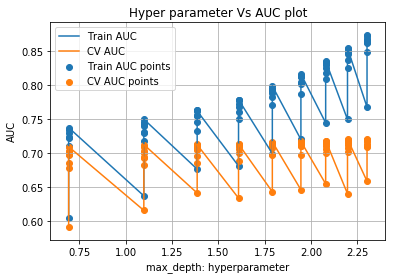

In [0]:
from math import log
results = results.sort_values(['param_max_depth','param_n_estimators'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']

max_depth =  results['param_max_depth']
n_estimators = results['param_n_estimators']

max_depth = [log(x) for x in max_depth]
n_estimators = [log(x) for x in n_estimators]
plt.plot(max_depth, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(max_depth, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(max_depth, train_auc, label='Train AUC points')
plt.scatter(max_depth, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()




Text(0.5, 1.0, 'Train AUC Score')

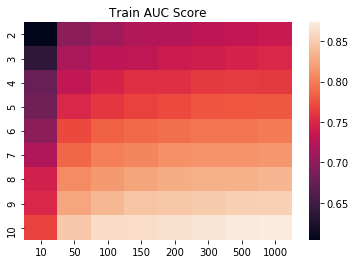

In [0]:
max_depth =  [2, 3, 4, 5, 6, 7, 8, 9, 10]
n_estimators = [10, 50, 100, 150, 200, 300, 500, 1000]
ax = sns.heatmap((train_auc.values).reshape(9,8),xticklabels=n_estimators,yticklabels=max_depth)
ax.set_title("Train AUC Score")

In [0]:
(train_auc.values).reshape(6,4)

array([[0.56839973, 0.56839973, 0.56839973, 0.56839973],
       [0.68480268, 0.68480268, 0.68414183, 0.68276719],
       [0.79684695, 0.79361537, 0.77521448, 0.74793768],
       [0.98623438, 0.9783378 , 0.92531688, 0.83338891],
       [0.99715541, 0.99328797, 0.95176092, 0.84596852],
       [0.99993044, 0.99833582, 0.96248548, 0.84983979]])

Text(0.5, 1.0, 'Cross Validation AUC Score')

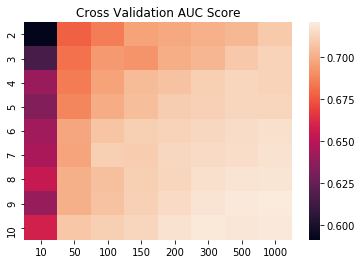

In [0]:
max_depth =  [2, 3, 4, 5, 6, 7, 8, 9, 10]
n_estimators = [10, 50, 100, 150, 200, 300, 500, 1000]
ax = sns.heatmap((cv_auc.values).reshape(9,8),xticklabels=n_estimators,yticklabels=max_depth)
ax.set_title("Cross Validation AUC Score")

In [0]:
results_score_sorted = results.sort_values(by=['mean_test_score'],ascending=False)
results_score_sorted.head()

mean_fit_time  std_fit_time  ...  mean_train_score  std_train_score
63     127.066852      0.394110  ...          0.854226         0.000472
71     145.144965      7.676433  ...          0.873209         0.001940
62      63.587051      0.416450  ...          0.853153         0.001477
69      45.132576      0.201301  ...          0.867315         0.002436
70      75.643102      0.694949  ...          0.871674         0.002234

[5 rows x 18 columns]

In [0]:
# #here we are choosing the hyperparameters based on cross-validation results
# best_max_depth=10
# best_min_samples_split=500
# n_estimators = [10, 50, 100, 150, 200, 300, 500, 1000], max_depth = [2, 3, 4, 5, 6, 7, 8, 9, 10]

best_n_estimators = 1000
best_max_depth = 9

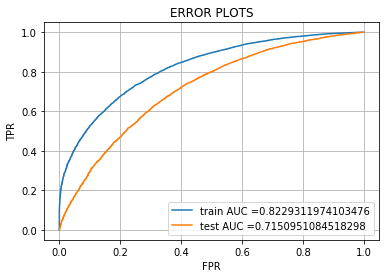

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
# 'max_depth':[1, 5, 10, 50, 100, 500, 100], 'min_samples_split': [5, 10, 100, 500]
clf = RandomForestClassifier(max_depth=best_max_depth,n_estimators=best_n_estimators,class_weight='balanced')
clf.fit(X_tr, y_train)


y_train_pred = batch_predict(clf, X_tr)    
y_test_pred = batch_predict(clf, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [0]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [0]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
conf_mat_train = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
print("Test confusion matrix")
conf_mat_test = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.5495375331934627 for threshold 0.5
Train confusion matrix
[[ 5577  1849]
 [11164 30451]]
Test confusion matrix
[[ 3337  2122]
 [ 8904 21689]]


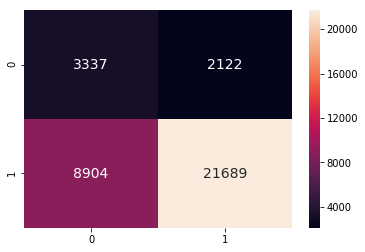

In [0]:
#heatmap confusion matrix https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
sns.heatmap(conf_mat_test, annot=True,annot_kws={"size": 14},fmt='g')

### 2.4.2 Applying Decision Trees Classifier on TFIDF,<font color='red'> SET 2</font>

In [0]:
     
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr = hstack(( X_train_essay_tfidf,X_train_title_tfidf,X_train[['teacher_number_of_previously_posted_projects','essay_word_count','title_count','price','quantity','clean_categories_pos','clean_categories_neg','clean_subcategories_pos','clean_subcategories_neg','school_state_pos','school_state_neg','teacher_prefix_pos','teacher_prefix_neg','grade_prob_pos','grade_prob_neg','pos','neg','neu','compound']])).tocsr()
X_cr = hstack((X_cv_essay_tfidf ,X_cv_title_tfidf,X_cv[['teacher_number_of_previously_posted_projects','essay_word_count','title_count','price','quantity','clean_categories_pos','clean_categories_neg','clean_subcategories_pos','clean_subcategories_neg','school_state_pos','school_state_neg','teacher_prefix_pos','teacher_prefix_neg','grade_prob_pos','grade_prob_neg','pos','neg','neu','compound']])).tocsr()
X_te = hstack(( X_test_essay_tfidf,X_test_title_tfidf,X_test[['teacher_number_of_previously_posted_projects','essay_word_count','title_count','price','quantity','clean_categories_pos','clean_categories_neg','clean_subcategories_pos','clean_subcategories_neg','school_state_pos','school_state_neg','teacher_prefix_pos','teacher_prefix_neg','grade_prob_pos','grade_prob_neg','pos','neg','neu','compound']])).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

feat_tfidf = feat_tfidf_essay+feat_tfidf_title+['teacher_number_of_previously_posted_projects','essay_word_count','title_count','price','quantity','clean_categories_pos','clean_categories_neg','clean_subcategories_pos','clean_subcategories_neg','school_state_pos','school_state_neg','teacher_prefix_pos','teacher_prefix_neg','grade_prob_pos','grade_prob_neg','pos','neg','neu','compound']

Final Data matrix
(49041, 6019) (49041,)
(24155, 6019) (24155,)
(36052, 6019) (36052,)


In [0]:
len(feat_tfidf)

6019

In [0]:
# https://www.geeksforgeeks.org/understanding-python-pickling-example/
import pickle


# Its important to use binary mode 
pickle_file = open('drive/My Drive/Applied_AI/Assignments/Ass8Pickle_TFIDF.pkl', 'wb') 

# source, destination 
pickle.dump(X_tr, pickle_file)
pickle.dump(y_train, pickle_file)
pickle.dump(X_cr, pickle_file)
pickle.dump(y_cv, pickle_file)
pickle.dump(X_te, pickle_file)
pickle.dump(y_test, pickle_file)
pickle.dump(feat_tfidf, pickle_file)
pickle_file.close() 

In [0]:
pickle_file = open('drive/My Drive/Applied_AI/Assignments/Ass8Pickle_TFIDF.pkl', 'rb')     
X_tr = pickle.load(pickle_file) 
y_train = pickle.load(pickle_file)
X_cr = pickle.load(pickle_file) 
y_cv = pickle.load(pickle_file)
X_te = pickle.load(pickle_file) 
y_test = pickle.load(pickle_file)
feat_tfidf= pickle.load(pickle_file)
pickle_file.close()

In [0]:
X_tr.shape

(49041, 619)

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

dt = RandomForestClassifier(class_weight="balanced")

parameters = {'n_estimators' : [10, 50, 100, 150, 200, 300, 500, 1000], 'max_depth' : [2, 3, 4, 5, 6, 7, 8, 9, 10]}

clf = GridSearchCV(dt, parameters, cv= 3, scoring='roc_auc',n_jobs= -1,return_train_score = True)

clf.fit(X_tr, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)


In [0]:
# https://www.geeksforgeeks.org/understanding-python-pickling-example/
import pickle


# Its important to use binary mode 
pickle_file = open('drive/My Drive/Applied_AI/Assignments/Ass9Pickle_tfidf_model_cv.pkl', 'wb') 

# source, destination 
pickle.dump(clf, pickle_file)
pickle_file.close() 

In [0]:
pickle_file = open('drive/My Drive/Applied_AI/Assignments/Ass9Pickle_tfidf_model_cv.pkl', 'rb')
clf = pickle.load(pickle_file)
pickle_file.close()

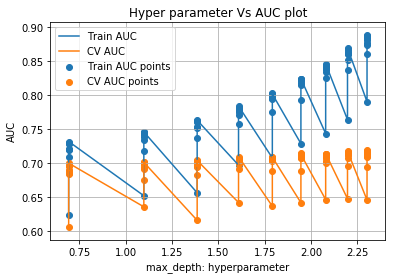

In [0]:
from math import log
results = results.sort_values(['param_max_depth','param_n_estimators'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']

max_depth =  results['param_max_depth']
n_estimators = results['param_n_estimators']

max_depth = [log(x) for x in max_depth]
n_estimators = [log(x) for x in n_estimators]
plt.plot(max_depth, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(max_depth, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(max_depth, train_auc, label='Train AUC points')
plt.scatter(max_depth, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()




Text(0.5, 1.0, 'Train AUC Score')

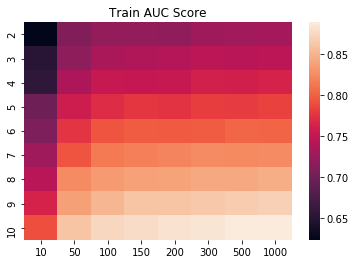

In [0]:
max_depth =  [2, 3, 4, 5, 6, 7, 8, 9, 10]
n_estimators = [10, 50, 100, 150, 200, 300, 500, 1000]
ax = sns.heatmap((train_auc.values).reshape(9,8),xticklabels=n_estimators,yticklabels=max_depth)
ax.set_title("Train AUC Score")

Text(0.5, 1.0, 'Cross Validation AUC Score')

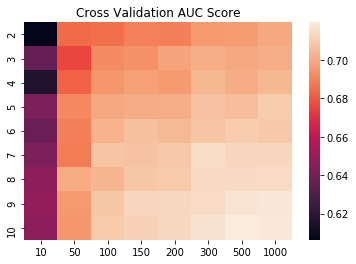

In [0]:
max_depth =  [2, 3, 4, 5, 6, 7, 8, 9, 10]
n_estimators = [10, 50, 100, 150, 200, 300, 500, 1000]
ax = sns.heatmap((cv_auc.values).reshape(9,8),xticklabels=n_estimators,yticklabels=max_depth)
ax.set_title("Cross Validation AUC Score")

In [0]:
results_score_sorted = results.sort_values(by=['mean_test_score'],ascending=False)
results_score_sorted.head()

mean_fit_time  std_fit_time  ...  mean_train_score  std_train_score
70      70.982758     14.930644  ...          0.888424         0.000892
71     151.902077     35.765728  ...          0.887880         0.001153
63     105.829475      0.947971  ...          0.869565         0.001443
62      52.358723      0.221485  ...          0.866114         0.000065
69      36.571051      0.226176  ...          0.883758         0.002198

[5 rows x 18 columns]

In [0]:
# #here we are choosing the hyperparameters based on cross-validation results
# best_max_depth=10
# best_min_samples_split=500
# n_estimators = [10, 50, 100, 150, 200, 300, 500, 1000], max_depth = [2, 3, 4, 5, 6, 7, 8, 9, 10]

best_n_estimators = 500
best_max_depth = 10

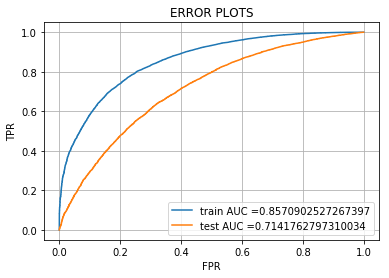

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
# 'max_depth':[1, 5, 10, 50, 100, 500, 100], 'min_samples_split': [5, 10, 100, 500]
clf = RandomForestClassifier(max_depth=best_max_depth,n_estimators=best_n_estimators,class_weight='balanced')
clf.fit(X_tr, y_train)


y_train_pred = batch_predict(clf, X_tr)    
y_test_pred = batch_predict(clf, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [0]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
conf_mat_train = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
print("Test confusion matrix")
conf_mat_test = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.5968842536038123 for threshold 0.514
Train confusion matrix
[[ 2925   800]
 [ 4988 15807]]
Test confusion matrix
[[ 1598  1152]
 [ 4193 11083]]


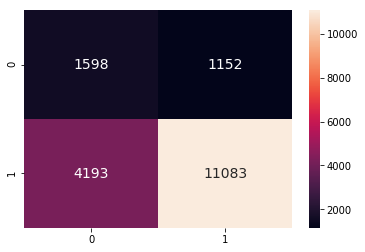

In [0]:
#heatmap confusion matrix https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
sns.heatmap(conf_mat_test, annot=True,annot_kws={"size": 14},fmt='g')

### 2.4.3 Applying Decision Trees Classifier on AVG W2V,<font color='red'> SET 3</font>

In [0]:
     
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr = hstack(( avg_w2v_vectors_train,avg_w2v_vectors_train_title,X_train[['teacher_number_of_previously_posted_projects','essay_word_count','title_count','price','quantity','clean_categories_pos','clean_categories_neg','clean_subcategories_pos','clean_subcategories_neg','school_state_pos','school_state_neg','teacher_prefix_pos','teacher_prefix_neg','grade_prob_pos','grade_prob_neg','pos','neg','neu','compound']])).tocsr()
X_cr = hstack((avg_w2v_vectors_cv,avg_w2v_vectors_cv_title,X_cv[['teacher_number_of_previously_posted_projects','essay_word_count','title_count','price','quantity','clean_categories_pos','clean_categories_neg','clean_subcategories_pos','clean_subcategories_neg','school_state_pos','school_state_neg','teacher_prefix_pos','teacher_prefix_neg','grade_prob_pos','grade_prob_neg','pos','neg','neu','compound']])).tocsr()
X_te = hstack(( avg_w2v_vectors_test,avg_w2v_vectors_test_title,X_test[['teacher_number_of_previously_posted_projects','essay_word_count','title_count','price','quantity','clean_categories_pos','clean_categories_neg','clean_subcategories_pos','clean_subcategories_neg','school_state_pos','school_state_neg','teacher_prefix_pos','teacher_prefix_neg','grade_prob_pos','grade_prob_neg','pos','neg','neu','compound']])).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(49041, 619) (49041,)
(24155, 619) (24155,)
(36052, 619) (36052,)


In [0]:
# https://www.geeksforgeeks.org/understanding-python-pickling-example/
import pickle


# Its important to use binary mode 
pickle_file = open('drive/My Drive/Applied_AI/Assignments/Ass8Pickle_W2V.pkl', 'wb') 

# source, destination 
pickle.dump(X_tr, pickle_file)
pickle.dump(y_train, pickle_file)
pickle.dump(X_cr, pickle_file)
pickle.dump(y_cv, pickle_file)
pickle.dump(X_te, pickle_file)
pickle.dump(y_test, pickle_file)
pickle_file.close() 

In [0]:
pickle_file = open('drive/My Drive/Applied_AI/Assignments/Ass8Pickle_W2V.pkl', 'rb')
X_tr = pickle.load(pickle_file) 
y_train = pickle.load(pickle_file)
X_cr = pickle.load(pickle_file) 
y_cv = pickle.load(pickle_file)
X_te = pickle.load(pickle_file) 
y_test = pickle.load(pickle_file)
pickle_file.close()

In [0]:
print(X_tr.shape)

(49041, 619)


In [0]:
X_tr_sub = X_tr[:24520,:]
y_train_sub = y_train[:24520]
X_cr_sub = X_cr[:12075,:]
y_cv_sub = y_cv[:12075]
X_te_sub = X_te[:18026,:]
y_test_sub = y_test[:18026]

print("Final Data matrix")
print(X_tr_sub.shape, y_train_sub.shape)
print(X_cr_sub.shape, y_cv_sub.shape)
print(X_te_sub.shape, y_test_sub.shape)
print("="*100)

Final Data matrix
(24520, 619) (24520,)
(12075, 619) (12075,)
(18026, 619) (18026,)


In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

dt = RandomForestClassifier(class_weight="balanced")
# [10, 50, 100, 150, 200, 300, 500, 1000]
parameters = {'n_estimators' : [10, 50, 100, 150, 200 , 250] , 'max_depth' : [2, 3, 4, 5, 6, 7, 8, 9, 10]}

clf = GridSearchCV(dt, parameters, cv= 3, scoring='roc_auc',n_jobs= -1,return_train_score = True)

clf.fit(X_tr_sub, y_train_sub)

results = pd.DataFrame.from_dict(clf.cv_results_)


In [0]:
# https://www.geeksforgeeks.org/understanding-python-pickling-example/
import pickle


# Its important to use binary mode 
pickle_file = open('drive/My Drive/Applied_AI/Assignments/Ass9Pickle_w2v_model_cv.pkl', 'wb') 

# source, destination 
pickle.dump(clf, pickle_file)
pickle_file.close() 

In [0]:
pickle_file = open('drive/My Drive/Applied_AI/Assignments/Ass9Pickle_w2v_model_cv.pkl', 'rb')
clf = pickle.load(pickle_file)
pickle_file.close()

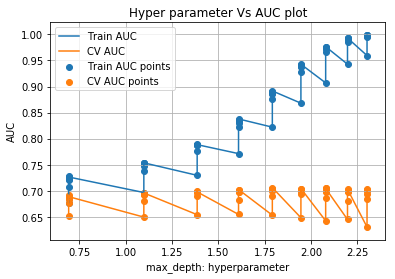

In [0]:
from math import log
results = results.sort_values(['param_max_depth','param_n_estimators'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']

max_depth =  results['param_max_depth']
n_estimators = results['param_n_estimators']

max_depth = [log(x) for x in max_depth]
n_estimators = [log(x) for x in n_estimators]
plt.plot(max_depth, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(max_depth, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(max_depth, train_auc, label='Train AUC points')
plt.scatter(max_depth, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()




Text(0.5, 1.0, 'Train AUC Score')

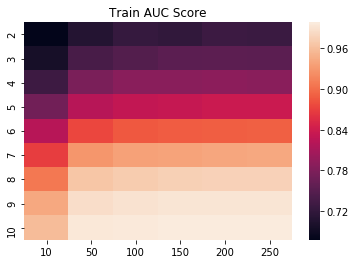

In [0]:
max_depth =  [2, 3, 4, 5, 6, 7, 8, 9, 10]
n_estimators = [10, 50, 100, 150, 200 , 250]
ax = sns.heatmap((train_auc.values).reshape(9,6),xticklabels=n_estimators,yticklabels=max_depth)
ax.set_title("Train AUC Score")

Text(0.5, 1.0, 'Cross Validation AUC Score')

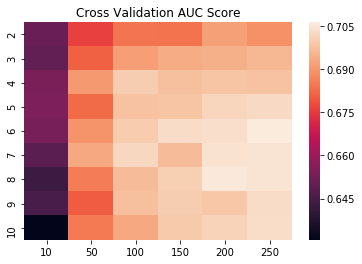

In [0]:
max_depth =  [2, 3, 4, 5, 6, 7, 8, 9, 10]
n_estimators = [10, 50, 100, 150, 200 , 250]
ax = sns.heatmap((cv_auc.values).reshape(9,6),xticklabels=n_estimators,yticklabels=max_depth)
ax.set_title("Cross Validation AUC Score")

In [0]:
results_score_sorted = results.sort_values(by=['mean_test_score'],ascending=False)
results_score_sorted.head()

mean_fit_time  std_fit_time  ...  mean_train_score  std_train_score
29      87.348661      0.089286  ...          0.891666         0.001428
40     108.765930      0.364813  ...          0.976290         0.000734
41     135.705956      0.438971  ...          0.976474         0.001778
35     110.457883      0.313855  ...          0.942786         0.001839
34      88.620077      0.166213  ...          0.941733         0.000524

[5 rows x 18 columns]

In [0]:
# #here we are choosing the hyperparameters based on cross-validation results
# best_max_depth=10
# best_min_samples_split=500
# n_estimators = [10, 50, 100, 150, 200, 300, 500, 1000], max_depth = [2, 3, 4, 5, 6, 7, 8, 9, 10]

best_n_estimators = 250
best_max_depth = 6

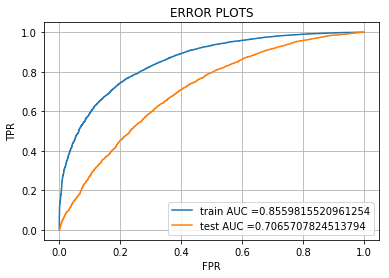

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
# 'max_depth':[1, 5, 10, 50, 100, 500, 100], 'min_samples_split': [5, 10, 100, 500]
clf = RandomForestClassifier(max_depth=best_max_depth,n_estimators=best_n_estimators,class_weight='balanced')
clf.fit(X_tr_sub, y_train_sub)


y_train_pred = batch_predict(clf, X_tr_sub)    
y_test_pred = batch_predict(clf, X_te_sub)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train_sub, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test_sub, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [0]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train_sub, predict_with_best_t(y_train_pred, best_t)))
conf_mat_train = confusion_matrix(y_train_sub, predict_with_best_t(y_train_pred, best_t))
print("Test confusion matrix")
conf_mat_test = confusion_matrix(y_test_sub, predict_with_best_t(y_test_pred, best_t))
print(confusion_matrix(y_test_sub, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.5968842536038123 for threshold 0.514
Train confusion matrix
[[ 2925   800]
 [ 4988 15807]]
Test confusion matrix
[[ 1598  1152]
 [ 4193 11083]]


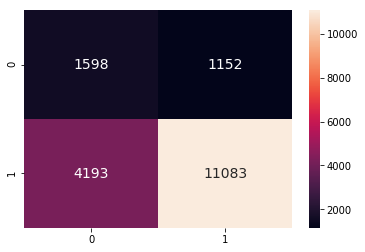

In [0]:
#heatmap confusion matrix https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
sns.heatmap(conf_mat_test, annot=True,annot_kws={"size": 14},fmt='g')

### 2.4.4 Applying Decision Trees Classifier on TFIDF W2V,<font color='red'> SET 4</font>

In [0]:
     
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr = hstack(( tfidf_w2v_vectors_train,tfidf_w2v_vectors_train_title,X_train[['teacher_number_of_previously_posted_projects','essay_word_count','title_count','price','quantity','clean_categories_pos','clean_categories_neg','clean_subcategories_pos','clean_subcategories_neg','school_state_pos','school_state_neg','teacher_prefix_pos','teacher_prefix_neg','grade_prob_pos','grade_prob_neg','pos','neg','neu','compound']])).tocsr()
X_cr = hstack((tfidf_w2v_vectors_cv,tfidf_w2v_vectors_cv_title,X_cv[['teacher_number_of_previously_posted_projects','essay_word_count','title_count','price','quantity','clean_categories_pos','clean_categories_neg','clean_subcategories_pos','clean_subcategories_neg','school_state_pos','school_state_neg','teacher_prefix_pos','teacher_prefix_neg','grade_prob_pos','grade_prob_neg','pos','neg','neu','compound']])).tocsr()
X_te = hstack(( tfidf_w2v_vectors_test,tfidf_w2v_vectors_test_title,X_test[['teacher_number_of_previously_posted_projects','essay_word_count','title_count','price','quantity','clean_categories_pos','clean_categories_neg','clean_subcategories_pos','clean_subcategories_neg','school_state_pos','school_state_neg','teacher_prefix_pos','teacher_prefix_neg','grade_prob_pos','grade_prob_neg','pos','neg','neu','compound']])).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(49041, 619) (49041,)
(24155, 619) (24155,)
(36052, 619) (36052,)


In [0]:
# https://www.geeksforgeeks.org/understanding-python-pickling-example/
import pickle


# Its important to use binary mode 
pickle_file = open('drive/My Drive/Applied_AI/Assignments/Ass8PickleTW.pkl', 'wb') 

# source, destination 
pickle.dump(X_tr, pickle_file)
pickle.dump(y_train, pickle_file)
pickle.dump(X_cr, pickle_file)
pickle.dump(y_cv, pickle_file)
pickle.dump(X_te, pickle_file)
pickle.dump(y_test, pickle_file)
pickle_file.close() 

In [0]:
pickle_file = open('drive/My Drive/Applied_AI/Assignments/Ass8PickleTW.pkl', 'rb')      
X_tr = pickle.load(pickle_file) 
y_train = pickle.load(pickle_file)
X_cr = pickle.load(pickle_file) 
y_cv = pickle.load(pickle_file)
X_te = pickle.load(pickle_file) 
y_test = pickle.load(pickle_file)
pickle_file.close()

In [0]:
print(X_tr.shape)

(49041, 619)


In [0]:
X_tr_sub = X_tr[:24520,:]
y_train_sub = y_train[:24520]
X_cr_sub = X_cr[:12075,:]
y_cv_sub = y_cv[:12075]
X_te_sub = X_te[:18026,:]
y_test_sub = y_test[:18026]

print("Final Data matrix")
print(X_tr_sub.shape, y_train_sub.shape)
print(X_cr_sub.shape, y_cv_sub.shape)
print(X_te_sub.shape, y_test_sub.shape)
print("="*100)

Final Data matrix
(24520, 619) (24520,)
(12075, 619) (12075,)
(18026, 619) (18026,)


In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

dt = RandomForestClassifier(class_weight="balanced")
# [10, 50, 100, 150, 200 , 250]
parameters = {'n_estimators' : [10, 50, 100, 150, 200 , 250] , 'max_depth' : [2, 3, 4, 5, 6, 7, 8, 9, 10]}

clf = GridSearchCV(dt, parameters, cv= 3, scoring='roc_auc',n_jobs= -1,return_train_score = True)

clf.fit(X_tr_sub, y_train_sub)

results = pd.DataFrame.from_dict(clf.cv_results_)


In [0]:
# https://www.geeksforgeeks.org/understanding-python-pickling-example/
import pickle


# Its important to use binary mode 
pickle_file = open('drive/My Drive/Applied_AI/Assignments/Ass9Pickle_tfidf_w2v_model_cv.pkl', 'wb') 

# source, destination 
pickle.dump(clf, pickle_file)
pickle_file.close() 

In [0]:
pickle_file = open('drive/My Drive/Applied_AI/Assignments/Ass9Pickle_w2v_model_cv.pkl', 'rb')
clf = pickle.load(pickle_file)
pickle_file.close()

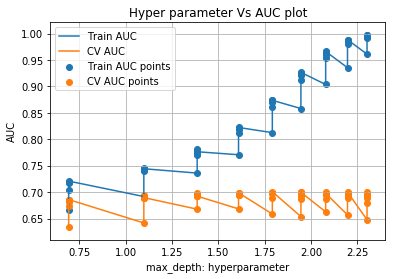

In [0]:
from math import log
results = results.sort_values(['param_max_depth','param_n_estimators'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']

max_depth =  results['param_max_depth']
n_estimators = results['param_n_estimators']

max_depth = [log(x) for x in max_depth]
n_estimators = [log(x) for x in n_estimators]
plt.plot(max_depth, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(max_depth, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(max_depth, train_auc, label='Train AUC points')
plt.scatter(max_depth, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()




Text(0.5, 1.0, 'Train AUC Score')

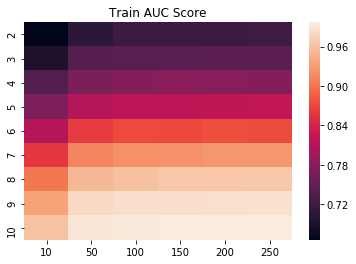

In [0]:
max_depth =  [2, 3, 4, 5, 6, 7, 8, 9, 10]
n_estimators = [10, 50, 100, 150, 200 , 250]
ax = sns.heatmap((train_auc.values).reshape(9,6),xticklabels=n_estimators,yticklabels=max_depth)
ax.set_title("Train AUC Score")

Text(0.5, 1.0, 'Cross Validation AUC Score')

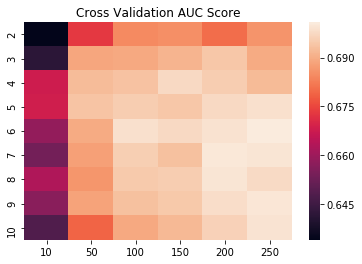

In [0]:
max_depth =  [2, 3, 4, 5, 6, 7, 8, 9, 10]
n_estimators = [10, 50, 100, 150, 200 , 250]
ax = sns.heatmap((cv_auc.values).reshape(9,6),xticklabels=n_estimators,yticklabels=max_depth)
ax.set_title("Cross Validation AUC Score")

In [0]:
results_score_sorted = results.sort_values(by=['mean_test_score'],ascending=False)
results_score_sorted.head()

mean_fit_time  std_fit_time  ...  mean_train_score  std_train_score
29      85.652181      0.532007  ...          0.873678         0.001751
34      86.275157      0.435405  ...          0.926049         0.001580
47     159.275267      0.251728  ...          0.988328         0.001113
40     106.133549      0.714028  ...          0.965605         0.000996
35     108.216236      0.225649  ...          0.926545         0.000979

[5 rows x 18 columns]

In [0]:
# #here we are choosing the hyperparameters based on cross-validation results
# best_max_depth=10
# best_min_samples_split=500
# n_estimators = [10, 50, 100, 150, 200, 300, 500, 1000], max_depth = [2, 3, 4, 5, 6, 7, 8, 9, 10]

best_n_estimators = 250
best_max_depth = 6

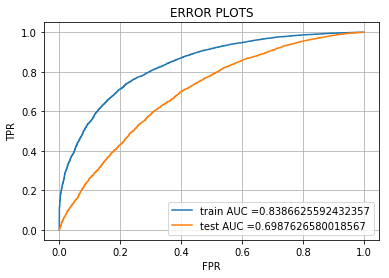

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
# 'max_depth':[1, 5, 10, 50, 100, 500, 100], 'min_samples_split': [5, 10, 100, 500]
clf = RandomForestClassifier(max_depth=best_max_depth,n_estimators=best_n_estimators,class_weight='balanced')
clf.fit(X_tr_sub, y_train_sub)



y_train_pred = batch_predict(clf, X_tr_sub)    
y_test_pred = batch_predict(clf, X_te_sub)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train_sub, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test_sub, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [0]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train_sub, predict_with_best_t(y_train_pred, best_t)))
conf_mat_train = confusion_matrix(y_train_sub, predict_with_best_t(y_train_pred, best_t))
print("Test confusion matrix")
conf_mat_test = confusion_matrix(y_test_sub, predict_with_best_t(y_test_pred, best_t))
print(confusion_matrix(y_test_sub, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.5769197874424511 for threshold 0.507
Train confusion matrix
[[ 2900   825]
 [ 5385 15410]]
Test confusion matrix
[[ 1617  1133]
 [ 4420 10856]]


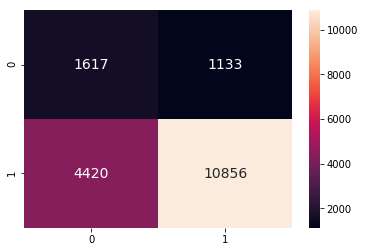

In [0]:
#heatmap confusion matrix https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
sns.heatmap(conf_mat_test, annot=True,annot_kws={"size": 14},fmt='g')

### GBDT

### 2.5.1 BOW data

In [0]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

# 'teacher_number_of_previously_posted_projects', 'preprocessed_essays',
#        'essay_word_count', 'preprocessed_title', 'title_count', 'price',
#        'quantity', 'clean_categories_pos', 'clean_categories_neg','clean_subcategories_pos', 'clean_subcategories_neg','school_state_pos', 'school_state_neg', 'teacher_prefix_pos','teacher_prefix_neg', 'grade_prob_pos', 'grade_prob_neg', 'pos', 'neg','neu', 'compound'
X_tr = hstack(( X_train_essay_bow,X_train_title_bow,X_train[['teacher_number_of_previously_posted_projects','essay_word_count','title_count','price','quantity','clean_categories_pos','clean_categories_neg','clean_subcategories_pos','clean_subcategories_neg','school_state_pos','school_state_neg','teacher_prefix_pos','teacher_prefix_neg','grade_prob_pos','grade_prob_neg','pos','neg','neu','compound']])).tocsr()
X_cr = hstack((X_cv_essay_bow ,X_cv_title_bow,X_cv[['teacher_number_of_previously_posted_projects','essay_word_count','title_count','price','quantity','clean_categories_pos','clean_categories_neg','clean_subcategories_pos','clean_subcategories_neg','school_state_pos','school_state_neg','teacher_prefix_pos','teacher_prefix_neg','grade_prob_pos','grade_prob_neg','pos','neg','neu','compound']])).tocsr()
X_te = hstack(( X_test_essay_bow,X_test_title_bow,X_test[['teacher_number_of_previously_posted_projects','essay_word_count','title_count','price','quantity','clean_categories_pos','clean_categories_neg','clean_subcategories_pos','clean_subcategories_neg','school_state_pos','school_state_neg','teacher_prefix_pos','teacher_prefix_neg','grade_prob_pos','grade_prob_neg','pos','neg','neu','compound']])).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

feat_bow = feat_bow_essay+feat_bow_title+['teacher_number_of_previously_posted_projects','essay_word_count','title_count','price','quantity','clean_categories_pos','clean_categories_neg','clean_subcategories_pos','clean_subcategories_neg','school_state_pos','school_state_neg','teacher_prefix_pos','teacher_prefix_neg','grade_prob_pos','grade_prob_neg','pos','neg','neu','compound']

Final Data matrix
(49041, 8239) (49041,)
(24155, 8239) (24155,)
(36052, 8239) (36052,)


In [0]:
len(feat_bow)

8254

In [0]:
# https://www.geeksforgeeks.org/understanding-python-pickling-example/
import pickle


# Its important to use binary mode 
pickle_file = open('drive/My Drive/Applied_AI/Assignments/Ass8Pickle_BOW.pkl', 'wb') 

# source, destination 
pickle.dump(X_tr, pickle_file)
pickle.dump(y_train, pickle_file)
pickle.dump(X_cr, pickle_file)
pickle.dump(y_cv, pickle_file)
pickle.dump(X_te, pickle_file)
pickle.dump(y_test, pickle_file)
pickle.dump(feat_bow, pickle_file)
pickle_file.close() 

In [0]:

pickle_file = open('drive/My Drive/Applied_AI/Assignments/Ass8Pickle_BOW.pkl', 'rb')      
X_tr = pickle.load(pickle_file) 
y_train = pickle.load(pickle_file)
X_cr = pickle.load(pickle_file) 
y_cv = pickle.load(pickle_file)
X_te = pickle.load(pickle_file) 
y_test = pickle.load(pickle_file)
feat_bow = pickle.load(pickle_file)
pickle_file.close()

In [0]:
X_tr.shape

(49041, 8254)

In [0]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

In [0]:
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import GradientBoostingClassifier

dt = GradientBoostingClassifier()

parameters = {'n_estimators' : [10, 50, 100, 150, 200, 250], 'max_depth' : [2, 3, 4 ,5]}

clf = GridSearchCV(dt, parameters, cv= 3, scoring='roc_auc',n_jobs= -1,return_train_score = True)

clf.fit(X_tr, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)


In [0]:
# https://www.geeksforgeeks.org/understanding-python-pickling-example/
import pickle


# Its important to use binary mode 
pickle_file = open('drive/My Drive/Applied_AI/Assignments/Ass9Pickle_gbdt_BOW_model_cv.pkl', 'wb') 

# source, destination 
pickle.dump(clf, pickle_file)
pickle_file.close() 

In [0]:
pickle_file = open('drive/My Drive/Applied_AI/Assignments/Ass9Pickle_gbdt_BOW_model_cv.pkl', 'rb')
clf = pickle.load(pickle_file)
pickle_file.close()

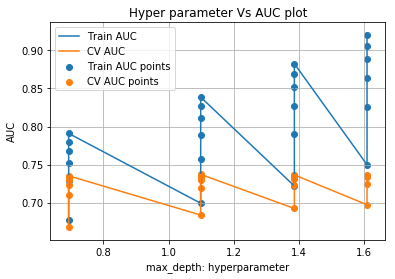

In [0]:
from math import log
results = results.sort_values(['param_max_depth','param_n_estimators'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']

max_depth =  results['param_max_depth']
n_estimators = results['param_n_estimators']

max_depth = [log(x) for x in max_depth]
n_estimators = [log(x) for x in n_estimators]
plt.plot(max_depth, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(max_depth, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(max_depth, train_auc, label='Train AUC points')
plt.scatter(max_depth, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()




Text(0.5, 1.0, 'Train AUC Score')

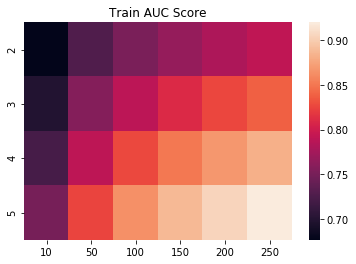

In [0]:
max_depth =  [2, 3, 4 ,5]
n_estimators = [10, 50, 100, 150, 200, 250]
ax = sns.heatmap((train_auc.values).reshape(4,6),xticklabels=n_estimators,yticklabels=max_depth)
ax.set_title("Train AUC Score")

In [0]:
(train_auc.values).reshape(6,4)

array([[0.56839973, 0.56839973, 0.56839973, 0.56839973],
       [0.68480268, 0.68480268, 0.68414183, 0.68276719],
       [0.79684695, 0.79361537, 0.77521448, 0.74793768],
       [0.98623438, 0.9783378 , 0.92531688, 0.83338891],
       [0.99715541, 0.99328797, 0.95176092, 0.84596852],
       [0.99993044, 0.99833582, 0.96248548, 0.84983979]])

Text(0.5, 1.0, 'Cross Validation AUC Score')

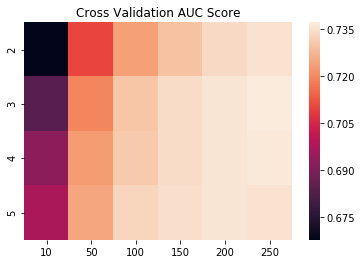

In [0]:
max_depth =  [2, 3, 4 ,5]
n_estimators = [10, 50, 100, 150, 200,250]
ax = sns.heatmap((cv_auc.values).reshape(4,6),xticklabels=n_estimators,yticklabels=max_depth)
ax.set_title("Cross Validation AUC Score")

In [0]:
results_score_sorted = results.sort_values(by=['mean_test_score'],ascending=False)
results_score_sorted.head()

mean_fit_time  std_fit_time  ...  mean_train_score  std_train_score
11     330.257997      0.245255  ...          0.838594         0.001352
17     429.038998      0.323914  ...          0.882495         0.002244
10     266.195190      0.608733  ...          0.826531         0.001421
16     346.187223      0.161050  ...          0.868392         0.002665
22     437.524809      0.722971  ...          0.905156         0.002116

[5 rows x 18 columns]

In [0]:
!pip install xgboost==0.80


     |████████████████████████████████| 15.8MB 2.2MB/s 
  Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [0]:
# #here we are choosing the hyperparameters based on cross-validation results
# best_max_depth=10
# best_min_samples_split=500
# n_estimators = [10, 50, 100, 150, 200, 300, 500, 1000], max_depth = [2, 3, 4, 5, 6, 7, 8, 9, 10]

best_n_estimators = 250
best_max_depth = 3

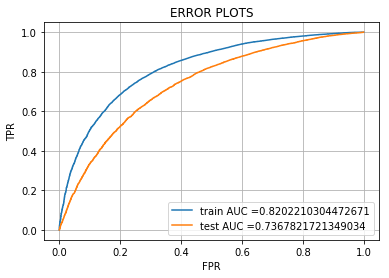

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

from sklearn.ensemble import GradientBoostingClassifier
# 'max_depth':[1, 5, 10, 50, 100, 500, 100], 'min_samples_split': [5, 10, 100, 500]

clf = GradientBoostingClassifier(max_depth=best_max_depth,n_estimators=best_n_estimators )
clf.fit(X_tr, y_train)


y_train_pred = batch_predict(clf,X_tr)    
y_test_pred = batch_predict(clf,X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [0]:
np.isnan(y_train_pred)

array([ True,  True,  True, ...,  True,  True,  True])

In [0]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [0]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
conf_mat_train = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
print("Test confusion matrix")
conf_mat_test = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.5588170440961658 for threshold 0.834
Train confusion matrix
[[ 5494  1932]
 [10182 31433]]
Test confusion matrix
[[ 3404  2055]
 [ 8220 22373]]


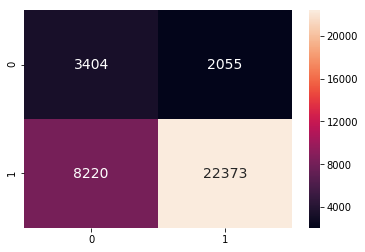

In [0]:
#heatmap confusion matrix https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
sns.heatmap(conf_mat_test, annot=True,annot_kws={"size": 14},fmt='g')

### 2.5.2 Applying Decision Trees Classifier on TFIDF,<font color='red'> SET 2</font>

In [0]:
     
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr = hstack(( X_train_essay_tfidf,X_train_title_tfidf,X_train[['teacher_number_of_previously_posted_projects','essay_word_count','title_count','price','quantity','clean_categories_pos','clean_categories_neg','clean_subcategories_pos','clean_subcategories_neg','school_state_pos','school_state_neg','teacher_prefix_pos','teacher_prefix_neg','grade_prob_pos','grade_prob_neg','pos','neg','neu','compound']])).tocsr()
X_cr = hstack((X_cv_essay_tfidf ,X_cv_title_tfidf,X_cv[['teacher_number_of_previously_posted_projects','essay_word_count','title_count','price','quantity','clean_categories_pos','clean_categories_neg','clean_subcategories_pos','clean_subcategories_neg','school_state_pos','school_state_neg','teacher_prefix_pos','teacher_prefix_neg','grade_prob_pos','grade_prob_neg','pos','neg','neu','compound']])).tocsr()
X_te = hstack(( X_test_essay_tfidf,X_test_title_tfidf,X_test[['teacher_number_of_previously_posted_projects','essay_word_count','title_count','price','quantity','clean_categories_pos','clean_categories_neg','clean_subcategories_pos','clean_subcategories_neg','school_state_pos','school_state_neg','teacher_prefix_pos','teacher_prefix_neg','grade_prob_pos','grade_prob_neg','pos','neg','neu','compound']])).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

feat_tfidf = feat_tfidf_essay+feat_tfidf_title+['teacher_number_of_previously_posted_projects','essay_word_count','title_count','price','quantity','clean_categories_pos','clean_categories_neg','clean_subcategories_pos','clean_subcategories_neg','school_state_pos','school_state_neg','teacher_prefix_pos','teacher_prefix_neg','grade_prob_pos','grade_prob_neg','pos','neg','neu','compound']

Final Data matrix
(49041, 6019) (49041,)
(24155, 6019) (24155,)
(36052, 6019) (36052,)


In [0]:
len(feat_tfidf)

6019

In [0]:
# https://www.geeksforgeeks.org/understanding-python-pickling-example/
import pickle


# Its important to use binary mode 
pickle_file = open('drive/My Drive/Applied_AI/Assignments/Ass8Pickle_TFIDF.pkl', 'wb') 

# source, destination 
pickle.dump(X_tr, pickle_file)
pickle.dump(y_train, pickle_file)
pickle.dump(X_cr, pickle_file)
pickle.dump(y_cv, pickle_file)
pickle.dump(X_te, pickle_file)
pickle.dump(y_test, pickle_file)
pickle.dump(feat_tfidf, pickle_file)
pickle_file.close() 

In [0]:
pickle_file = open('drive/My Drive/Applied_AI/Assignments/Ass8Pickle_TFIDF.pkl', 'rb')     
X_tr = pickle.load(pickle_file) 
y_train = pickle.load(pickle_file)
X_cr = pickle.load(pickle_file) 
y_cv = pickle.load(pickle_file)
X_te = pickle.load(pickle_file) 
y_test = pickle.load(pickle_file)
feat_tfidf= pickle.load(pickle_file)
pickle_file.close()

In [0]:
X_tr.shape

(49041, 619)

In [0]:
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import GradientBoostingClassifier

dt = GradientBoostingClassifier()

parameters = {'n_estimators' : [10, 50, 100, 150, 200, 250], 'max_depth' : [2, 3, 4 ,5]}

clf = GridSearchCV(dt, parameters, cv= 3, scoring='roc_auc',n_jobs= -1,return_train_score = True)

clf.fit(X_tr, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)


In [0]:
# https://www.geeksforgeeks.org/understanding-python-pickling-example/
import pickle


# Its important to use binary mode 
pickle_file = open('drive/My Drive/Applied_AI/Assignments/Ass9Pickle_gbdt_tfidf_model_cv.pkl', 'wb') 

# source, destination 
pickle.dump(clf, pickle_file)
pickle_file.close() 

In [0]:
pickle_file = open('drive/My Drive/Applied_AI/Assignments/Ass9Pickle_gbdt_tfidf_model_cv.pkl', 'rb')
clf = pickle.load(pickle_file)
pickle_file.close()

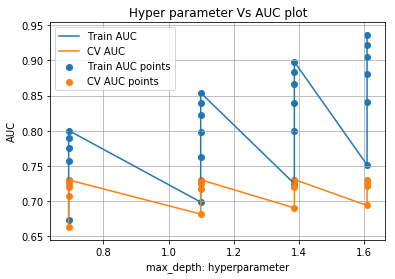

In [0]:
from math import log
results = results.sort_values(['param_max_depth','param_n_estimators'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']

max_depth =  results['param_max_depth']
n_estimators = results['param_n_estimators']

max_depth = [log(x) for x in max_depth]
n_estimators = [log(x) for x in n_estimators]
plt.plot(max_depth, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(max_depth, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(max_depth, train_auc, label='Train AUC points')
plt.scatter(max_depth, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()




Text(0.5, 1.0, 'Train AUC Score')

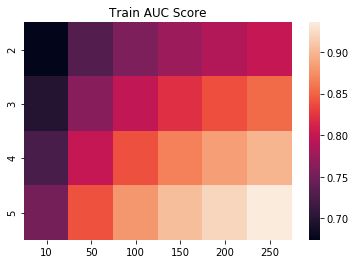

In [0]:
max_depth =  [2, 3, 4, 5]
n_estimators = [10, 50, 100, 150, 200, 250]
ax = sns.heatmap((train_auc.values).reshape(4,6),xticklabels=n_estimators,yticklabels=max_depth)
ax.set_title("Train AUC Score")

Text(0.5, 1.0, 'Cross Validation AUC Score')

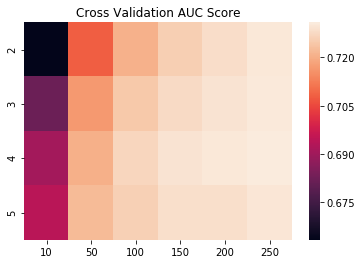

In [0]:
max_depth =  [2, 3, 4, 5]
n_estimators = [10, 50, 100, 150, 200, 250]
ax = sns.heatmap((cv_auc.values).reshape(4,6),xticklabels=n_estimators,yticklabels=max_depth)
ax.set_title("Cross Validation AUC Score")

In [0]:
results_score_sorted = results.sort_values(by=['mean_test_score'],ascending=False)
results_score_sorted.head()

mean_fit_time  std_fit_time  ...  mean_train_score  std_train_score
17     860.642279      3.870961  ...          0.898028         0.001383
11     647.265758      2.475001  ...          0.854004         0.000840
5      439.544347      6.198070  ...          0.800449         0.001370
16     681.157867      1.642487  ...          0.883745         0.000723
23    1028.164881     60.190385  ...          0.935686         0.001263

[5 rows x 18 columns]

In [0]:
# #here we are choosing the hyperparameters based on cross-validation results
# best_max_depth=10
# best_min_samples_split=500
# n_estimators = [10, 50, 100, 150, 200, 300, 500, 1000], max_depth = [2, 3, 4, 5, 6, 7, 8, 9, 10]

best_n_estimators = 250
best_max_depth = 4

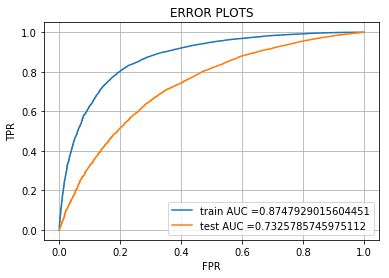

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
# 'max_depth':[1, 5, 10, 50, 100, 500, 100], 'min_samples_split': [5, 10, 100, 500]
clf = GradientBoostingClassifier(max_depth=best_max_depth,n_estimators=best_n_estimators)
clf.fit(X_tr, y_train)


y_train_pred = batch_predict(clf, X_tr)    
y_test_pred = batch_predict(clf, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [0]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
conf_mat_train = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
print("Test confusion matrix")
conf_mat_test = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.6437817787673736 for threshold 0.823
Train confusion matrix
[[ 5884  1542]
 [ 7803 33812]]
Test confusion matrix
[[ 3112  2347]
 [ 7107 23486]]


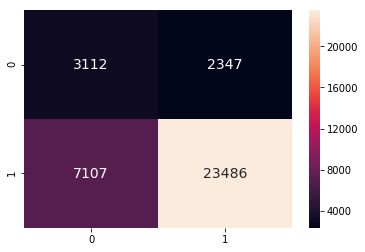

In [0]:
#heatmap confusion matrix https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
sns.heatmap(conf_mat_test, annot=True,annot_kws={"size": 14},fmt='g')

### 2.5.3 Applying Decision Trees Classifier on AVG W2V,<font color='red'> SET 3</font>

In [0]:
     
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr = hstack(( avg_w2v_vectors_train,avg_w2v_vectors_train_title,X_train[['teacher_number_of_previously_posted_projects','essay_word_count','title_count','price','quantity','clean_categories_pos','clean_categories_neg','clean_subcategories_pos','clean_subcategories_neg','school_state_pos','school_state_neg','teacher_prefix_pos','teacher_prefix_neg','grade_prob_pos','grade_prob_neg','pos','neg','neu','compound']])).tocsr()
X_cr = hstack((avg_w2v_vectors_cv,avg_w2v_vectors_cv_title,X_cv[['teacher_number_of_previously_posted_projects','essay_word_count','title_count','price','quantity','clean_categories_pos','clean_categories_neg','clean_subcategories_pos','clean_subcategories_neg','school_state_pos','school_state_neg','teacher_prefix_pos','teacher_prefix_neg','grade_prob_pos','grade_prob_neg','pos','neg','neu','compound']])).tocsr()
X_te = hstack(( avg_w2v_vectors_test,avg_w2v_vectors_test_title,X_test[['teacher_number_of_previously_posted_projects','essay_word_count','title_count','price','quantity','clean_categories_pos','clean_categories_neg','clean_subcategories_pos','clean_subcategories_neg','school_state_pos','school_state_neg','teacher_prefix_pos','teacher_prefix_neg','grade_prob_pos','grade_prob_neg','pos','neg','neu','compound']])).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(49041, 619) (49041,)
(24155, 619) (24155,)
(36052, 619) (36052,)


In [0]:
# https://www.geeksforgeeks.org/understanding-python-pickling-example/
import pickle


# Its important to use binary mode 
pickle_file = open('drive/My Drive/Applied_AI/Assignments/Ass8Pickle_W2V.pkl', 'wb') 

# source, destination 
pickle.dump(X_tr, pickle_file)
pickle.dump(y_train, pickle_file)
pickle.dump(X_cr, pickle_file)
pickle.dump(y_cv, pickle_file)
pickle.dump(X_te, pickle_file)
pickle.dump(y_test, pickle_file)
pickle_file.close() 

In [0]:
pickle_file = open('drive/My Drive/Applied_AI/Assignments/Ass8Pickle_W2V.pkl', 'rb')
X_tr = pickle.load(pickle_file) 
y_train = pickle.load(pickle_file)
X_cr = pickle.load(pickle_file) 
y_cv = pickle.load(pickle_file)
X_te = pickle.load(pickle_file) 
y_test = pickle.load(pickle_file)
pickle_file.close()

In [5]:
print(X_tr.shape)

(49041, 619)


In [6]:
X_tr_sub = X_tr[:24520,:]
y_train_sub = y_train[:24520]
X_cr_sub = X_cr[:12075,:]
y_cv_sub = y_cv[:12075]
X_te_sub = X_te[:18026,:]
y_test_sub = y_test[:18026]

print("Final Data matrix")
print(X_tr_sub.shape, y_train_sub.shape)
print(X_cr_sub.shape, y_cv_sub.shape)
print(X_te_sub.shape, y_test_sub.shape)
print("="*100)

Final Data matrix
(24520, 619) (24520,)
(12075, 619) (12075,)
(18026, 619) (18026,)


In [0]:
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import GradientBoostingClassifier

dt = GradientBoostingClassifier()
# [10, 50, 100, 150, 200, 300, 500, 1000]
parameters = {'n_estimators' : [10, 100, 200 , 250] , 'max_depth' : [2, 3, 4, 5]}

clf = GridSearchCV(dt, parameters, cv= 3, scoring='roc_auc',n_jobs= -1,return_train_score = True)

clf.fit(X_tr_sub, y_train_sub)

results = pd.DataFrame.from_dict(clf.cv_results_)


In [0]:
# https://www.geeksforgeeks.org/understanding-python-pickling-example/
import pickle


# Its important to use binary mode 
pickle_file = open('drive/My Drive/Applied_AI/Assignments/Ass9Pickle_gbdt_w2v_model_cv.pkl', 'wb') 

# source, destination 
pickle.dump(clf, pickle_file)
pickle_file.close() 

In [0]:
pickle_file = open('drive/My Drive/Applied_AI/Assignments/Ass9Pickle_gbdt_w2v_model_cv.pkl', 'rb')
clf = pickle.load(pickle_file)
pickle_file.close()

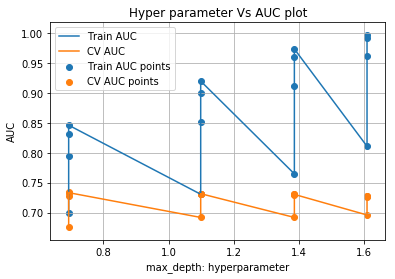

In [10]:
from math import log
results = results.sort_values(['param_max_depth','param_n_estimators'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']

max_depth =  results['param_max_depth']
n_estimators = results['param_n_estimators']

max_depth = [log(x) for x in max_depth]
n_estimators = [log(x) for x in n_estimators]
plt.plot(max_depth, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(max_depth, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(max_depth, train_auc, label='Train AUC points')
plt.scatter(max_depth, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()




Text(0.5, 1.0, 'Train AUC Score')

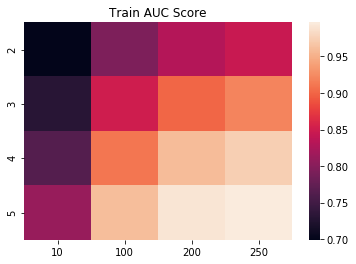

In [11]:
max_depth =  [2, 3, 4, 5]
n_estimators = [10, 100, 200 , 250]
ax = sns.heatmap((train_auc.values).reshape(4,4),xticklabels=n_estimators,yticklabels=max_depth)
ax.set_title("Train AUC Score")

Text(0.5, 1.0, 'Cross Validation AUC Score')

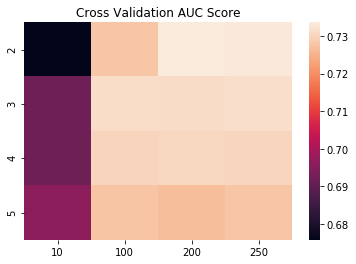

In [12]:
max_depth =  [2, 3, 4, 5]
n_estimators = [10, 100, 200 , 250]
ax = sns.heatmap((cv_auc.values).reshape(4,4),xticklabels=n_estimators,yticklabels=max_depth)
ax.set_title("Cross Validation AUC Score")

In [13]:
results_score_sorted = results.sort_values(by=['mean_test_score'],ascending=False)
results_score_sorted.head()

mean_fit_time  std_fit_time  ...  mean_train_score  std_train_score
2     851.233909      6.966024  ...          0.831446         0.002087
3    1066.808741      0.592575  ...          0.846191         0.002128
7    1529.818506      5.034462  ...          0.919933         0.001965
5     635.358147      0.199325  ...          0.850983         0.002741
6    1244.809255     13.520138  ...          0.900844         0.002707

[5 rows x 18 columns]

In [0]:
# #here we are choosing the hyperparameters based on cross-validation results
# best_max_depth=10
# best_min_samples_split=500
# n_estimators = [10, 50, 100, 150, 200, 300, 500, 1000], max_depth = [2, 3, 4, 5, 6, 7, 8, 9, 10]

best_n_estimators = 200
best_max_depth = 2

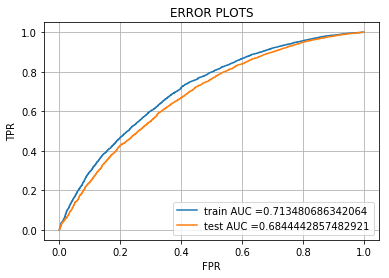

In [16]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
# 'max_depth':[1, 5, 10, 50, 100, 500, 100], 'min_samples_split': [5, 10, 100, 500]
clf = RandomForestClassifier(max_depth=best_max_depth,n_estimators=best_n_estimators,class_weight='balanced')
clf.fit(X_tr_sub, y_train_sub)



y_train_pred = batch_predict(clf, X_tr_sub)    
y_test_pred = batch_predict(clf, X_te_sub)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train_sub, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test_sub, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [18]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train_sub, predict_with_best_t(y_train_pred, best_t)))
conf_mat_train = confusion_matrix(y_train_sub, predict_with_best_t(y_train_pred, best_t))
print("Test confusion matrix")
conf_mat_test = confusion_matrix(y_test_sub, predict_with_best_t(y_test_pred, best_t))
print(confusion_matrix(y_test_sub, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.4333133771508703 for threshold 0.499
Train confusion matrix
[[ 2350  1375]
 [ 6512 14283]]
Test confusion matrix
[[ 1631  1119]
 [ 4940 10336]]


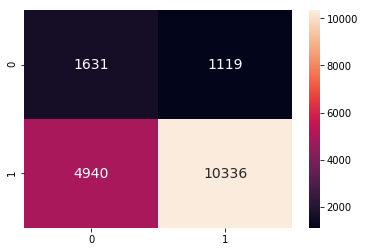

In [19]:
#heatmap confusion matrix https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
sns.heatmap(conf_mat_test, annot=True,annot_kws={"size": 14},fmt='g')

### 2.5.4 Applying Decision Trees Classifier on TFIDF W2V,<font color='red'> SET 4</font>

In [0]:
     
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr = hstack(( tfidf_w2v_vectors_train,tfidf_w2v_vectors_train_title,X_train[['teacher_number_of_previously_posted_projects','essay_word_count','title_count','price','quantity','clean_categories_pos','clean_categories_neg','clean_subcategories_pos','clean_subcategories_neg','school_state_pos','school_state_neg','teacher_prefix_pos','teacher_prefix_neg','grade_prob_pos','grade_prob_neg','pos','neg','neu','compound']])).tocsr()
X_cr = hstack((tfidf_w2v_vectors_cv,tfidf_w2v_vectors_cv_title,X_cv[['teacher_number_of_previously_posted_projects','essay_word_count','title_count','price','quantity','clean_categories_pos','clean_categories_neg','clean_subcategories_pos','clean_subcategories_neg','school_state_pos','school_state_neg','teacher_prefix_pos','teacher_prefix_neg','grade_prob_pos','grade_prob_neg','pos','neg','neu','compound']])).tocsr()
X_te = hstack(( tfidf_w2v_vectors_test,tfidf_w2v_vectors_test_title,X_test[['teacher_number_of_previously_posted_projects','essay_word_count','title_count','price','quantity','clean_categories_pos','clean_categories_neg','clean_subcategories_pos','clean_subcategories_neg','school_state_pos','school_state_neg','teacher_prefix_pos','teacher_prefix_neg','grade_prob_pos','grade_prob_neg','pos','neg','neu','compound']])).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(49041, 619) (49041,)
(24155, 619) (24155,)
(36052, 619) (36052,)


In [0]:
# https://www.geeksforgeeks.org/understanding-python-pickling-example/
import pickle


# Its important to use binary mode 
pickle_file = open('drive/My Drive/Applied_AI/Assignments/Ass8PickleTW.pkl', 'wb') 

# source, destination 
pickle.dump(X_tr, pickle_file)
pickle.dump(y_train, pickle_file)
pickle.dump(X_cr, pickle_file)
pickle.dump(y_cv, pickle_file)
pickle.dump(X_te, pickle_file)
pickle.dump(y_test, pickle_file)
pickle_file.close() 

In [0]:
pickle_file = open('drive/My Drive/Applied_AI/Assignments/Ass8PickleTW.pkl', 'rb')      
X_tr = pickle.load(pickle_file) 
y_train = pickle.load(pickle_file)
X_cr = pickle.load(pickle_file) 
y_cv = pickle.load(pickle_file)
X_te = pickle.load(pickle_file) 
y_test = pickle.load(pickle_file)
pickle_file.close()

In [0]:
print(X_tr.shape)

(49041, 619)


In [0]:
X_tr_sub = X_tr[:24520,:]
y_train_sub = y_train[:24520]
X_cr_sub = X_cr[:12075,:]
y_cv_sub = y_cv[:12075]
X_te_sub = X_te[:18026,:]
y_test_sub = y_test[:18026]

print("Final Data matrix")
print(X_tr_sub.shape, y_train_sub.shape)
print(X_cr_sub.shape, y_cv_sub.shape)
print(X_te_sub.shape, y_test_sub.shape)
print("="*100)

Final Data matrix
(24520, 619) (24520,)
(12075, 619) (12075,)
(18026, 619) (18026,)


In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

dt = RandomForestClassifier(class_weight="balanced")
# [10, 50, 100, 150, 200 , 250]
parameters = {'n_estimators' : [10, 50, 100, 150, 200 , 250] , 'max_depth' : [2, 3, 4, 5, 6, 7, 8, 9, 10]}

clf = GridSearchCV(dt, parameters, cv= 3, scoring='roc_auc',n_jobs= -1,return_train_score = True)

clf.fit(X_tr_sub, y_train_sub)

results = pd.DataFrame.from_dict(clf.cv_results_)


In [0]:
# https://www.geeksforgeeks.org/understanding-python-pickling-example/
import pickle


# Its important to use binary mode 
pickle_file = open('drive/My Drive/Applied_AI/Assignments/Ass9Pickle_tfidf_w2v_model_cv.pkl', 'wb') 

# source, destination 
pickle.dump(clf, pickle_file)
pickle_file.close() 

In [0]:
pickle_file = open('drive/My Drive/Applied_AI/Assignments/Ass9Pickle_w2v_model_cv.pkl', 'rb')
clf = pickle.load(pickle_file)
pickle_file.close()

In [0]:
X_tr_sub = X_tr[:24520,:]
y_train_sub = y_train[:24520]
X_cr_sub = X_cr[:12075,:]
y_cv_sub = y_cv[:12075]
X_te_sub = X_te[:18026,:]
y_test_sub = y_test[:18026]

print("Final Data matrix")
print(X_tr_sub.shape, y_train_sub.shape)
print(X_cr_sub.shape, y_cv_sub.shape)
print(X_te_sub.shape, y_test_sub.shape)
print("="*100)

Final Data matrix
(24520, 619) (24520,)
(12075, 619) (12075,)
(18026, 619) (18026,)


In [0]:
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import GradientBoostingClassifier

dt = GradientBoostingClassifier()
# [10, 50, 100, 150, 200, 300, 500, 1000]
parameters = {'n_estimators' : [10, 100, 200 , 250] , 'max_depth' : [2, 3, 4, 5]}

clf = GridSearchCV(dt, parameters, cv= 3, scoring='roc_auc',n_jobs= -1,return_train_score = True)

clf.fit(X_tr_sub, y_train_sub)

results = pd.DataFrame.from_dict(clf.cv_results_)


In [0]:
# https://www.geeksforgeeks.org/understanding-python-pickling-example/
import pickle


# Its important to use binary mode 
pickle_file = open('drive/My Drive/Applied_AI/Assignments/Ass9Pickle_gbdt_tfidf_w2v_model_cv.pkl', 'wb') 

# source, destination 
pickle.dump(clf, pickle_file)
pickle_file.close() 

In [0]:
pickle_file = open('drive/My Drive/Applied_AI/Assignments/Ass9Pickle_gbdt_tfidf_w2v_model_cv.pkl', 'rb')
clf = pickle.load(pickle_file)
pickle_file.close()

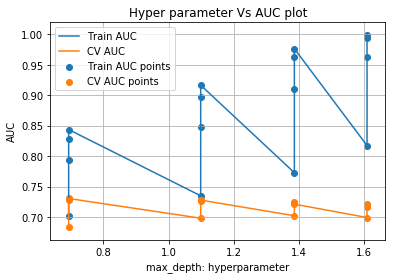

In [0]:
from math import log
results = results.sort_values(['param_max_depth','param_n_estimators'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']

max_depth =  results['param_max_depth']
n_estimators = results['param_n_estimators']

max_depth = [log(x) for x in max_depth]
n_estimators = [log(x) for x in n_estimators]
plt.plot(max_depth, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(max_depth, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(max_depth, train_auc, label='Train AUC points')
plt.scatter(max_depth, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()




Text(0.5, 1.0, 'Train AUC Score')

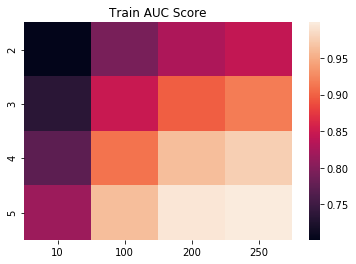

In [0]:
max_depth =  [2, 3, 4, 5]
n_estimators = [10, 100, 200 , 250]
ax = sns.heatmap((train_auc.values).reshape(4,4),xticklabels=n_estimators,yticklabels=max_depth)
ax.set_title("Train AUC Score")

Text(0.5, 1.0, 'Cross Validation AUC Score')

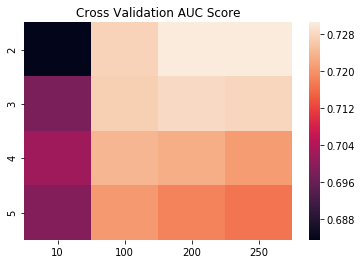

In [0]:
max_depth =  [2, 3, 4, 5]
n_estimators = [10, 100, 200 , 250]
ax = sns.heatmap((cv_auc.values).reshape(4,4),xticklabels=n_estimators,yticklabels=max_depth)
ax.set_title("Cross Validation AUC Score")

In [0]:
results_score_sorted = results.sort_values(by=['mean_test_score'],ascending=False)
results_score_sorted.head()

mean_fit_time  std_fit_time  ...  mean_train_score  std_train_score
2     712.138794      1.968906  ...          0.828687         0.003246
3     892.050653      2.317166  ...          0.843667         0.003016
6    1052.957311      4.471528  ...          0.897799         0.002502
7    1308.704969      3.608573  ...          0.916570         0.001665
1     360.515312      3.783918  ...          0.792847         0.003663

[5 rows x 18 columns]

In [0]:
# #here we are choosing the hyperparameters based on cross-validation results
# best_max_depth=10
# best_min_samples_split=500
# n_estimators = [10, 50, 100, 150, 200, 300, 500, 1000], max_depth = [2, 3, 4, 5, 6, 7, 8, 9, 10]

best_n_estimators = 200
best_max_depth = 2

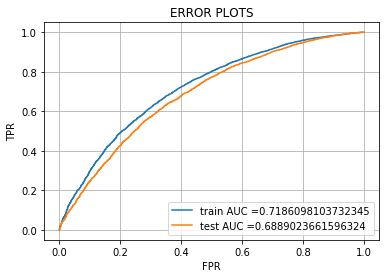

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
# 'max_depth':[1, 5, 10, 50, 100, 500, 100], 'min_samples_split': [5, 10, 100, 500]
clf = RandomForestClassifier(max_depth=best_max_depth,n_estimators=best_n_estimators,class_weight='balanced')
clf.fit(X_tr_sub, y_train_sub)



y_train_pred = batch_predict(clf, X_tr_sub)    
y_test_pred = batch_predict(clf, X_te_sub)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train_sub, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test_sub, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [0]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train_sub, predict_with_best_t(y_train_pred, best_t)))
conf_mat_train = confusion_matrix(y_train_sub, predict_with_best_t(y_train_pred, best_t))
print("Test confusion matrix")
conf_mat_test = confusion_matrix(y_test_sub, predict_with_best_t(y_test_pred, best_t))
print(confusion_matrix(y_test_sub, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.4398896353182473 for threshold 0.497
Train confusion matrix
[[ 2418  1307]
 [ 6703 14092]]
Test confusion matrix
[[ 1679  1071]
 [ 5116 10160]]


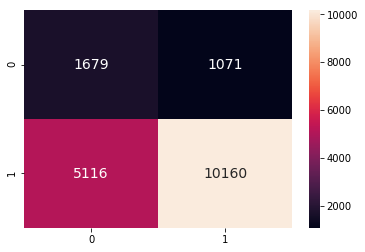

In [0]:
#heatmap confusion matrix https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
sns.heatmap(conf_mat_test, annot=True,annot_kws={"size": 14},fmt='g')

### Conclusion:

In [21]:
# Please compare all your models using Prettytable library
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Hyper Parameter", "AUC"]

x.add_row(["BOW", "Random Forest","max_depth:9,n_estimators:1000", 0.71 ])
x.add_row(["TFIDF", "Random Forest","max_depth:10,n_estimators:500", 0.71])
x.add_row(["AVG-W2V", "Random Forest","max_depth:6,n_estimators:250" , 0.7])
x.add_row(["TFIDF-W2V", "Random Forest","max_depth:5,n_estimators:500", 0.7])
x.add_row(["BOW", "GBDT","max_depth:3,n_estimators:250", 0.74 ])
x.add_row(["TFIDF", "GBDT","max_depth:4,n_estimators:250", 0.73])
x.add_row(["AVG-W2V", "GBDT","max_depth:2,n_estimators:200" , 0.68])
x.add_row(["TFIDF-W2V", "GBDT","max_depth:2,n_estimators:200", 0.69])

print(x)

+------------+---------------+-------------------------------+------+
| Vectorizer |     Model     |        Hyper Parameter        | AUC  |
+------------+---------------+-------------------------------+------+
|    BOW     | Random Forest | max_depth:9,n_estimators:1000 | 0.71 |
|   TFIDF    | Random Forest | max_depth:10,n_estimators:500 | 0.71 |
|  AVG-W2V   | Random Forest |  max_depth:6,n_estimators:250 | 0.7  |
| TFIDF-W2V  | Random Forest |  max_depth:5,n_estimators:500 | 0.7  |
|    BOW     |      GBDT     |  max_depth:3,n_estimators:250 | 0.74 |
|   TFIDF    |      GBDT     |  max_depth:4,n_estimators:250 | 0.73 |
|  AVG-W2V   |      GBDT     |  max_depth:2,n_estimators:200 | 0.68 |
| TFIDF-W2V  |      GBDT     |  max_depth:2,n_estimators:200 | 0.69 |
+------------+---------------+-------------------------------+------+
